In [74]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split



# Basisstijl voor plots

plt.rcParams["figure.figsize"] = (10, 6)

plt.rcParams["axes.grid"] = True



# ============================================================================

# STAP 1: DATA INLADEN EN EERSTE VERKENNING

# ============================================================================

print("="*80)

print("STAP 1: DATA INLADEN EN EERSTE VERKENNING")

print("="*80)



# Laad de dataset

df = pd.read_csv("Synthetic_Sleep_Lifestyle_Behavior_Dataset (1).csv")



print(f"\nDataset geladen met {df.shape[0]} rijen en {df.shape[1]} kolommen")

print("\nEerste 5 rijen:")

display(df.head())

STAP 1: DATA INLADEN EN EERSTE VERKENNING

Dataset geladen met 100000 rijen en 14 kolommen

Eerste 5 rijen:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Female,51.0,Accountant,8.37,8,76.0,3.0,Overweight,63,9469.0,Sleep Apnea,128,85
1,2,Male,39.0,Doctor,8.17,8,80.4,4.0,Normal,71,10348.0,NaN,135,90
2,3,Female,35.0,Engineer,6.54,6,18.0,5.0,Overweight,64,5408.0,NaN,139,91
3,4,Male,29.0,Doctor,6.63,6,7.0,4.0,Overweight,68,2659.0,Sleep Apnea,125,80
4,5,Female,43.0,Nurse,7.79,8,28.0,3.0,Overweight,68,4962.0,NaN,115,75


In [75]:
# ============================================================================
# STAP 2: DATA INSPECTIE EN KWALITEITSCONTROLE
# ============================================================================
print("\n" + "="*80)
print("STAP 2: DATA INSPECTIE EN KWALITEITSCONTROLE")
print("="*80)

print("\nInformatie over datatypes en geheugengebruik:")
df.info()

print("\n" + "-"*80)
print("CONTROLE OP ONTBREKENDE WAARDEN")
print("-"*80)
missing_values = df.isnull().sum()
missing_pct = 100 * df.isnull().sum() / len(df)
missing_table = pd.DataFrame({
    'Aantal Missing': missing_values,
    'Percentage': missing_pct
})
print(missing_table[missing_table['Aantal Missing'] > 0])

if missing_table['Aantal Missing'].sum() == 0:
    print("\n✓ Geen ontbrekende waarden gevonden in de dataset")
    print("Dit is gunstig voor modelontwikkeling omdat we geen imputatiestrategieën nodig hebben.")
else:
    print("\n⚠ Er zijn ontbrekende waarden die behandeld moeten worden")

print("\n" + "-"*80)
print("BESCHRIJVENDE STATISTIEKEN - NUMERIEKE VARIABELEN")
print("-"*80)
display(df.describe())





STAP 2: DATA INSPECTIE EN KWALITEITSCONTROLE

Informatie over datatypes en geheugengebruik:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Person ID                100000 non-null  int64  
 1   Gender                   100000 non-null  object 
 2   Age                      100000 non-null  float64
 3   Occupation               100000 non-null  object 
 4   Sleep Duration           100000 non-null  float64
 5   Quality of Sleep         100000 non-null  int64  
 6   Physical Activity Level  100000 non-null  float64
 7   Stress Level             100000 non-null  float64
 8   BMI Category             100000 non-null  object 
 9   Heart Rate               100000 non-null  int64  
 10  Daily Steps              100000 non-null  float64
 11  Sleep Disorder           40417 non-null   object 
 12  Systolic              

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,41.601936,7.141144,6.784260,57.858852,4.792294,69.580280,6779.552684,128.451840,84.43659
std,28867.657797,8.934439,0.751126,1.163061,19.807629,1.763382,4.086701,1646.832955,7.975394,6.18369
min,1.000000,14.000000,5.840000,4.000000,0.000000,1.000000,53.000000,41.000000,115.000000,75.00000
25%,25000.750000,35.000000,6.490000,6.000000,44.000000,4.000000,67.000000,5678.000000,125.000000,80.00000
50%,50000.500000,41.000000,7.140000,7.000000,58.000000,5.000000,69.000000,6786.000000,130.000000,85.00000
75%,75000.250000,47.000000,7.790000,8.000000,72.000000,6.000000,72.000000,7884.000000,135.000000,90.00000
max,100000.000000,100.000000,8.440000,8.000000,100.000000,10.000000,89.000000,13960.000000,142.000000,95.00000



STAP 3: TARGET VARIABELE ANALYSE

De target variabele 'Sleep Disorder' vormt de basis voor ons classificatieprobleem.
We onderzoeken de verdeling van klassen om te bepalen of we te maken hebben met
class imbalance en of dit speciale aandacht vereist tijdens modeltraining.

Verdeling van Sleep Disorder:
Sleep Disorder
None           59583
Sleep Apnea    20335
Insomnia       20082
Name: count, dtype: int64

Percentages:
Sleep Disorder
None           59.583
Sleep Apnea    20.335
Insomnia       20.082
Name: proportion, dtype: float64


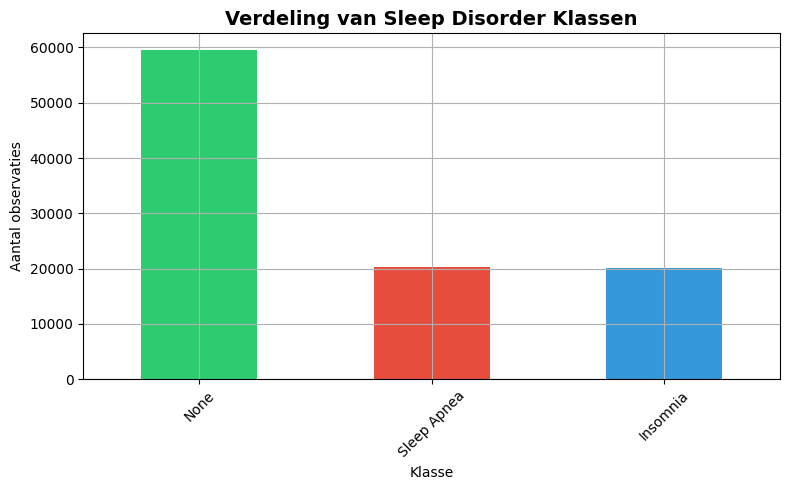


--------------------------------------------------------------------------------
INTERPRETATIE VAN KLASSENBALANS
--------------------------------------------------------------------------------

Imbalance ratio (grootste/kleinste klasse): 2.97
Er is enige klassenonevenwichtigheid. Overweeg stratified sampling en
  class_weight='balanced' parameter bij sommige modellen.


In [76]:
# ============================================================================
# STAP 3: TARGET VARIABELE ANALYSE
# ============================================================================
print("\n" + "="*80)
print("STAP 3: TARGET VARIABELE ANALYSE")
print("="*80)

print("\nDe target variabele 'Sleep Disorder' vormt de basis voor ons classificatieprobleem.")
print("We onderzoeken de verdeling van klassen om te bepalen of we te maken hebben met")
print("class imbalance en of dit speciale aandacht vereist tijdens modeltraining.\n")

# Vervang NaN in Sleep Disorder met 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("Verdeling van Sleep Disorder:")
class_distribution = df['Sleep Disorder'].value_counts()
print(class_distribution)
print(f"\nPercentages:")
print(df['Sleep Disorder'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
df['Sleep Disorder'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c', '#3498db'])
plt.title("Verdeling van Sleep Disorder Klassen", fontsize=14, fontweight='bold')
plt.xlabel("Klasse")
plt.ylabel("Aantal observaties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("INTERPRETATIE VAN KLASSENBALANS")
print("-"*80)

# Bereken imbalance ratio
min_class = class_distribution.min()
max_class = class_distribution.max()
imbalance_ratio = max_class / min_class

print(f"\nImbalance ratio (grootste/kleinste klasse): {imbalance_ratio:.2f}")

if imbalance_ratio < 1.5:
    print(" De klassen zijn redelijk gebalanceerd. Standaard modeltraining is geschikt.")
elif imbalance_ratio < 3:
    print("Er is enige klassenonevenwichtigheid. Overweeg stratified sampling en")
    print("  class_weight='balanced' parameter bij sommige modellen.")
else:
    print("Significante klassenonevenwichtigheid gedetecteerd!")
    print("  Overweeg: SMOTE, class weighting, of stratified k-fold cross-validation.")


In [77]:

# ============================================================================
# STAP 4: MULTICLASS VS BINARY CLASSIFICATIE - ONDERBOUWING
# ============================================================================
print("\n" + "="*80)
print("STAP 4: MODELTYPE KEUZE - MULTICLASS VS BINARY CLASSIFICATIE")
print("="*80)

print("""
RATIONALE VOOR MULTICLASS CLASSIFICATIE:
-----------------------------------------

Onze target variabele heeft drie categorieën:
1. None (geen slaapstoornis)
2. Insomnia (slapeloosheid)
3. Sleep Apnea (slaapapneu)

WAAROM MULTICLASS IN PLAATS VAN BINARY?
========================================

1. KLINISCHE RELEVANTIE:
   • Insomnia en Sleep Apnea hebben verschillende oorzaken, symptomen en behandelingen
   • Een binair model (wel/geen stoornis) zou deze cruciale distinctie verliezen
   • Voor medisch personeel is het essentieel om het TYPE stoornis te identificeren

2. BEHANDELINGSIMPLICATIES:
   • Insomnia → vaak cognitieve gedragstherapie, slaaphygiëne, medicatie
   • Sleep Apnea → CPAP-apparaat, gewichtsreductie, operatieve ingrepen
   • De aanpak verschilt fundamenteel

3. DIAGNOSTISCHE WAARDE:
   • Verschillende risicoprofielen: Sleep Apnea correleert met BMI en hartslag,
     Insomnia vaak met stress en levensstijlfactoren
   • Een multiclass model kan deze subtiele patronen onderscheiden

4. MODELCOMPLEXITEIT VS INFORMATIEBEHOUD:
   • Trade-off: multiclass is complexer, maar behoudt essentiële informatie
   • In medische context weegt informatieverlies zwaarder dan modelcomplexiteit


""")



STAP 4: MODELTYPE KEUZE - MULTICLASS VS BINARY CLASSIFICATIE

RATIONALE VOOR MULTICLASS CLASSIFICATIE:
-----------------------------------------

Onze target variabele heeft drie categorieën:
1. None (geen slaapstoornis)
2. Insomnia (slapeloosheid)
3. Sleep Apnea (slaapapneu)

WAAROM MULTICLASS IN PLAATS VAN BINARY?

1. KLINISCHE RELEVANTIE:
   • Insomnia en Sleep Apnea hebben verschillende oorzaken, symptomen en behandelingen
   • Een binair model (wel/geen stoornis) zou deze cruciale distinctie verliezen
   • Voor medisch personeel is het essentieel om het TYPE stoornis te identificeren

2. BEHANDELINGSIMPLICATIES:
   • Insomnia → vaak cognitieve gedragstherapie, slaaphygiëne, medicatie
   • Sleep Apnea → CPAP-apparaat, gewichtsreductie, operatieve ingrepen
   • De aanpak verschilt fundamenteel

3. DIAGNOSTISCHE WAARDE:
   • Verschillende risicoprofielen: Sleep Apnea correleert met BMI en hartslag,
     Insomnia vaak met stress en levensstijlfactoren
   • Een multiclass model kan de

In [78]:

# ============================================================================
# STAP 5: FEATURE TYPE IDENTIFICATIE EN CATEGORISATIE
# ============================================================================
print("\n" + "="*80)
print("STAP 5: FEATURE TYPE IDENTIFICATIE")
print("="*80)

# Numerieke kolommen
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Verwijder Person ID uit numerieke features (is geen predictive feature)
num_cols = [col for col in num_cols if col != 'Person ID']

# Categorische kolommen
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# Verwijder target uit categorische features
cat_feature_cols = [col for col in cat_cols if col != 'Sleep Disorder']

print(f"\nNumerieke features ({len(num_cols)}):")
for col in num_cols:
    print(f"  • {col}")

print(f"\nCategorische features ({len(cat_feature_cols)}):")
for col in cat_feature_cols:
    unique_values = df[col].nunique()
    print(f"  • {col} ({unique_values} unieke waarden)")
    print(f"    Waarden: {df[col].unique()[:5].tolist()}")



STAP 5: FEATURE TYPE IDENTIFICATIE

Numerieke features (9):
  • Age
  • Sleep Duration
  • Quality of Sleep
  • Physical Activity Level
  • Stress Level
  • Heart Rate
  • Daily Steps
  • Systolic
  • Diastolic

Categorische features (3):
  • Gender (2 unieke waarden)
    Waarden: ['Female', 'Male']
  • Occupation (11 unieke waarden)
    Waarden: ['Accountant', 'Doctor', 'Engineer', 'Nurse', 'Teacher']
  • BMI Category (4 unieke waarden)
    Waarden: ['Overweight', 'Normal', 'Normal Weight', 'Obese']



STAP 6: TRAIN-TEST SPLIT

DOEL VAN TRAIN-TEST SPLIT:

We splitsen de data in twee sets:
1. TRAINING SET: Model leert patronen uit deze data
2. TEST SET: Model wordt geëvalueerd op ongeziene data

Dit voorkomt OVERFITTING en geeft realistische performantie schatting.

KRITIEK: SPLIT VOOR ALLE TRANSFORMATIES!

We splitsen op de ONBEWERKTE data (na feature identificatie).
Alle bewerkingen (outlier behandeling, encoding, scaling) gebeuren DAARNA,
APART op train en test set.

WAAROM?
- Voorkomt data leakage (test info lekt niet naar train)
- Scaler fit op train, transform op test
- Encoder fit op train, transform op test
- Outlier grenzen bepaald op train, toegepast op test

SPLIT RATIO OVERWEGINGEN:

OPTIES:
- 90/10: Maximaal trainingsdata, maar kleine test set (minder betrouwbare metrics)
- 80/20: Goede balans (ONZE KEUZE)
- 70/30: Meer test data, maar minder trainingsdata
- 60/40: Bij zeer kleine datasets

ONZE KEUZE: 80/20 SPLIT

Rationale:
- Dataset heeft ~374 samples → 80% = ~299 tra

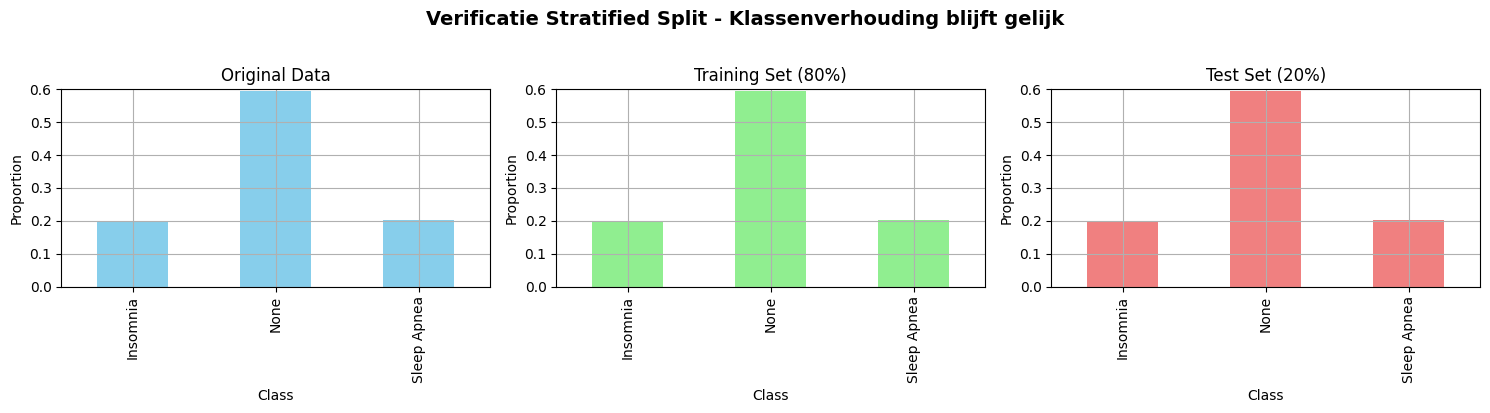


✓ Stratificatie succesvol: klassenverhouding identiek in train en test


In [79]:
# ============================================================================
# STAP 6: TRAIN-TEST SPLIT - DATA PARTITIONERING
# ============================================================================
print("\n" + "="*80)
print("STAP 6: TRAIN-TEST SPLIT")
print("="*80)

print("""
DOEL VAN TRAIN-TEST SPLIT:
===========================

We splitsen de data in twee sets:
1. TRAINING SET: Model leert patronen uit deze data
2. TEST SET: Model wordt geëvalueerd op ongeziene data

Dit voorkomt OVERFITTING en geeft realistische performantie schatting.

KRITIEK: SPLIT VOOR ALLE TRANSFORMATIES!
=========================================

We splitsen op de ONBEWERKTE data (na feature identificatie).
Alle bewerkingen (outlier behandeling, encoding, scaling) gebeuren DAARNA,
APART op train en test set.

WAAROM?
- Voorkomt data leakage (test info lekt niet naar train)
- Scaler fit op train, transform op test
- Encoder fit op train, transform op test
- Outlier grenzen bepaald op train, toegepast op test

SPLIT RATIO OVERWEGINGEN:
==========================

OPTIES:
- 90/10: Maximaal trainingsdata, maar kleine test set (minder betrouwbare metrics)
- 80/20: Goede balans (ONZE KEUZE)
- 70/30: Meer test data, maar minder trainingsdata
- 60/40: Bij zeer kleine datasets

ONZE KEUZE: 80/20 SPLIT
========================

Rationale:
- Dataset heeft ~374 samples → 80% = ~299 train, 20% = ~75 test
- 80% training is genoeg voor model learning
- 20% test is acceptabel voor betrouwbare evaluatie (hoewel aan de kleine kant)
- Breed geaccepteerd in ML literatuur (Hastie et al., 2009)

STRATIFIED SAMPLING:
====================

stratify=y zorgt dat de klassenverhouding gelijk blijft in train én test.

Voorbeeld: Als originele data 50% None, 30% Insomnia, 20% Sleep Apnea heeft,
dan heeft ZOWEL train ALS test deze verhoudingen.

WAAROM STRATIFICATION CRUCIAAL IS:
- Voorkomt dat één klasse oververtegenwoordigd is in test set
- Zorgt voor representatieve evaluatie
- Essentieel bij (lichte) class imbalance

RANDOM STATE:
=============
random_state=42 zorgt voor reproduceerbaarheid.
Elke run geeft identieke split → belangrijk voor:
- Vergelijking tussen modellen
- Rapportage van resultaten
- Samenwerking in team
""")

print("\n" + "-"*80)
print("UITVOEREN VAN SPLIT OP ONBEWERKTE DATA")
print("-"*80)

# Scheiding van features en target VOOR encoding/scaling
X = df.drop(['Sleep Disorder', 'Person ID'], axis=1)  # ✓ originele data
y = df['Sleep Disorder']  # nog als string

print(f"\nOriginele dataset:")
print(f"  • X shape: {X.shape}")
print(f"  • y shape: {y.shape}")

# Split op onbewerkte data
X_train, X_test, y_train, y_test = train_test_split(
    X,  # ✓ onbewerkte features
    y,  # ✓ onbewerkte target (nog strings)
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f"\nTRAINING SET:")
print(f"  • X_train shape: {X_train.shape}")
print(f"  • y_train shape: {y_train.shape}")
print(f"  • Percentage: {100 * len(X_train) / len(X):.1f}%")

print(f"\nTEST SET:")
print(f"  • X_test shape: {X_test.shape}")
print(f"  • y_test shape: {y_test.shape}")
print(f"  • Percentage: {100 * len(X_test) / len(X):.1f}%")

print("\n" + "-"*80)
print("VERIFICATIE VAN STRATIFICATIE")
print("-"*80)

print("\nKlassenverdeling in ORIGINELE data:")
print(y.value_counts(normalize=True).sort_index())

print("\nKlassenverdeling in TRAINING set:")
print(y_train.value_counts(normalize=True).sort_index())

print("\nKlassenverdeling in TEST set:")
print(y_test.value_counts(normalize=True).sort_index())

# Visualisatie van stratificatie
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

y.value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Original Data')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Class')
axes[0].set_ylim(0, 0.6)

y_train.value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Training Set (80%)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Class')
axes[1].set_ylim(0, 0.6)

y_test.value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[2], color='lightcoral')
axes[2].set_title('Test Set (20%)')
axes[2].set_ylabel('Proportion')
axes[2].set_xlabel('Class')
axes[2].set_ylim(0, 0.6)

plt.suptitle('Verificatie Stratified Split - Klassenverhouding blijft gelijk', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✓ Stratificatie succesvol: klassenverhouding identiek in train en test")



STAP 7: EXPLORATIEVE DATA ANALYSE (EDA)

BELANGRIJK: EDA wordt uitgevoerd op de TRAINING SET

Na de train-test split in stap 6, voeren we alle analyses uit op de training data.
De test set blijft 'ongezien' om data leakage te voorkomen.

Dit betekent:
- Distributies → berekend op train
- Correlaties → berekend op train  
- Outlier grenzen → bepaald op train (en toegepast op test in stap 8)
- Feature statistics → berekend op train


Training set voor EDA: 80000 samples × 13 kolommen

FEATURE IMPORTANCE - KLINISCHE RATIONALE

WAAROM ZIJN DEZE FEATURES BELANGRIJK VOOR SLAAPSTOORNIS CLASSIFICATIE?

1. SLEEP DURATION (Slaapduur) 
   • Primaire indicator van slaapstoornissen
   • Insomnia: <6 uur per nacht (chronisch slaaptekort)
   • Sleep Apnea: vaak normale duur, maar gefragmenteerde slaap
   • Verwachting: Duidelijk verschil tussen klassen

2. QUALITY OF SLEEP (Slaapkwaliteit) 
   • Subjectieve maat (self-reported, schaal 1-10)
   • Capteert ervaren slaapkwaliteit die objectieve metinge

,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,41.59,8.92,18.0,100.0,16066
None,41.59,8.94,14.0,96.0,47666
Sleep Apnea,41.66,8.92,17.0,93.0,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'Sleep Apnea' = 41.66
  • Laagste gemiddelde: 'None' = 41.59
  • Verschil: 0.07 (0.2% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Sleep Duration
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,7.14,0.75,5.84,8.44,16066
None,7.14,0.75,5.84,8.44,47666
Sleep Apnea,7.14,0.75,5.84,8.44,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'Sleep Apnea' = 7.14
  • Laagste gemiddelde: 'Insomnia' = 7.14
  • Verschil: 0.01 (0.1% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Quality of Sleep
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,6.78,1.16,4,8,16066
None,6.78,1.16,4,8,47666
Sleep Apnea,6.80,1.16,4,8,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'Sleep Apnea' = 6.80
  • Laagste gemiddelde: 'Insomnia' = 6.78
  • Verschil: 0.02 (0.3% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Physical Activity Level
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,57.97,19.64,0.0,100.0,16066
None,57.94,19.85,0.0,100.0,47666
Sleep Apnea,57.74,19.73,0.0,100.0,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'Insomnia' = 57.97
  • Laagste gemiddelde: 'Sleep Apnea' = 57.74
  • Verschil: 0.23 (0.4% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Stress Level
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,4.78,1.75,1.0,10.0,16066
None,4.80,1.76,1.0,10.0,47666
Sleep Apnea,4.78,1.76,1.0,10.0,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'None' = 4.80
  • Laagste gemiddelde: 'Sleep Apnea' = 4.78
  • Verschil: 0.02 (0.5% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Heart Rate
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,69.59,4.10,56,87,16066
None,69.60,4.09,53,89,47666
Sleep Apnea,69.54,4.04,55,87,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'None' = 69.60
  • Laagste gemiddelde: 'Sleep Apnea' = 69.54
  • Verschil: 0.06 (0.1% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Daily Steps
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,6780.36,1646.33,812.0,12719.0,16066
None,6787.42,1643.58,41.0,13960.0,47666
Sleep Apnea,6771.38,1633.80,659.0,13159.0,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'None' = 6787.42
  • Laagste gemiddelde: 'Sleep Apnea' = 6771.38
  • Verschil: 16.04 (0.2% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Systolic
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,128.53,7.97,115,142,16066
None,128.43,7.97,115,142,47666
Sleep Apnea,128.52,7.95,115,142,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'Insomnia' = 128.53
  • Laagste gemiddelde: 'None' = 128.43
  • Verschil: 0.10 (0.1% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

--------------------------------------------------------------------------------
FEATURE: Diastolic
--------------------------------------------------------------------------------


,Mean,Std,Min,Max,Count
Sleep Disorder,,,,,
Insomnia,84.50,6.18,75,95,16066
None,84.42,6.18,75,95,47666
Sleep Apnea,84.49,6.17,75,95,16268



 INTERPRETATIE:
  • Hoogste gemiddelde: 'Insomnia' = 84.50
  • Laagste gemiddelde: 'None' = 84.42
  • Verschil: 0.08 (0.1% van gemiddelde)
  ⚠ Zwakke discriminerende feature (<10% verschil)

DISTRIBUTIE VAN NUMERIEKE VARIABELEN (TRAINING SET)


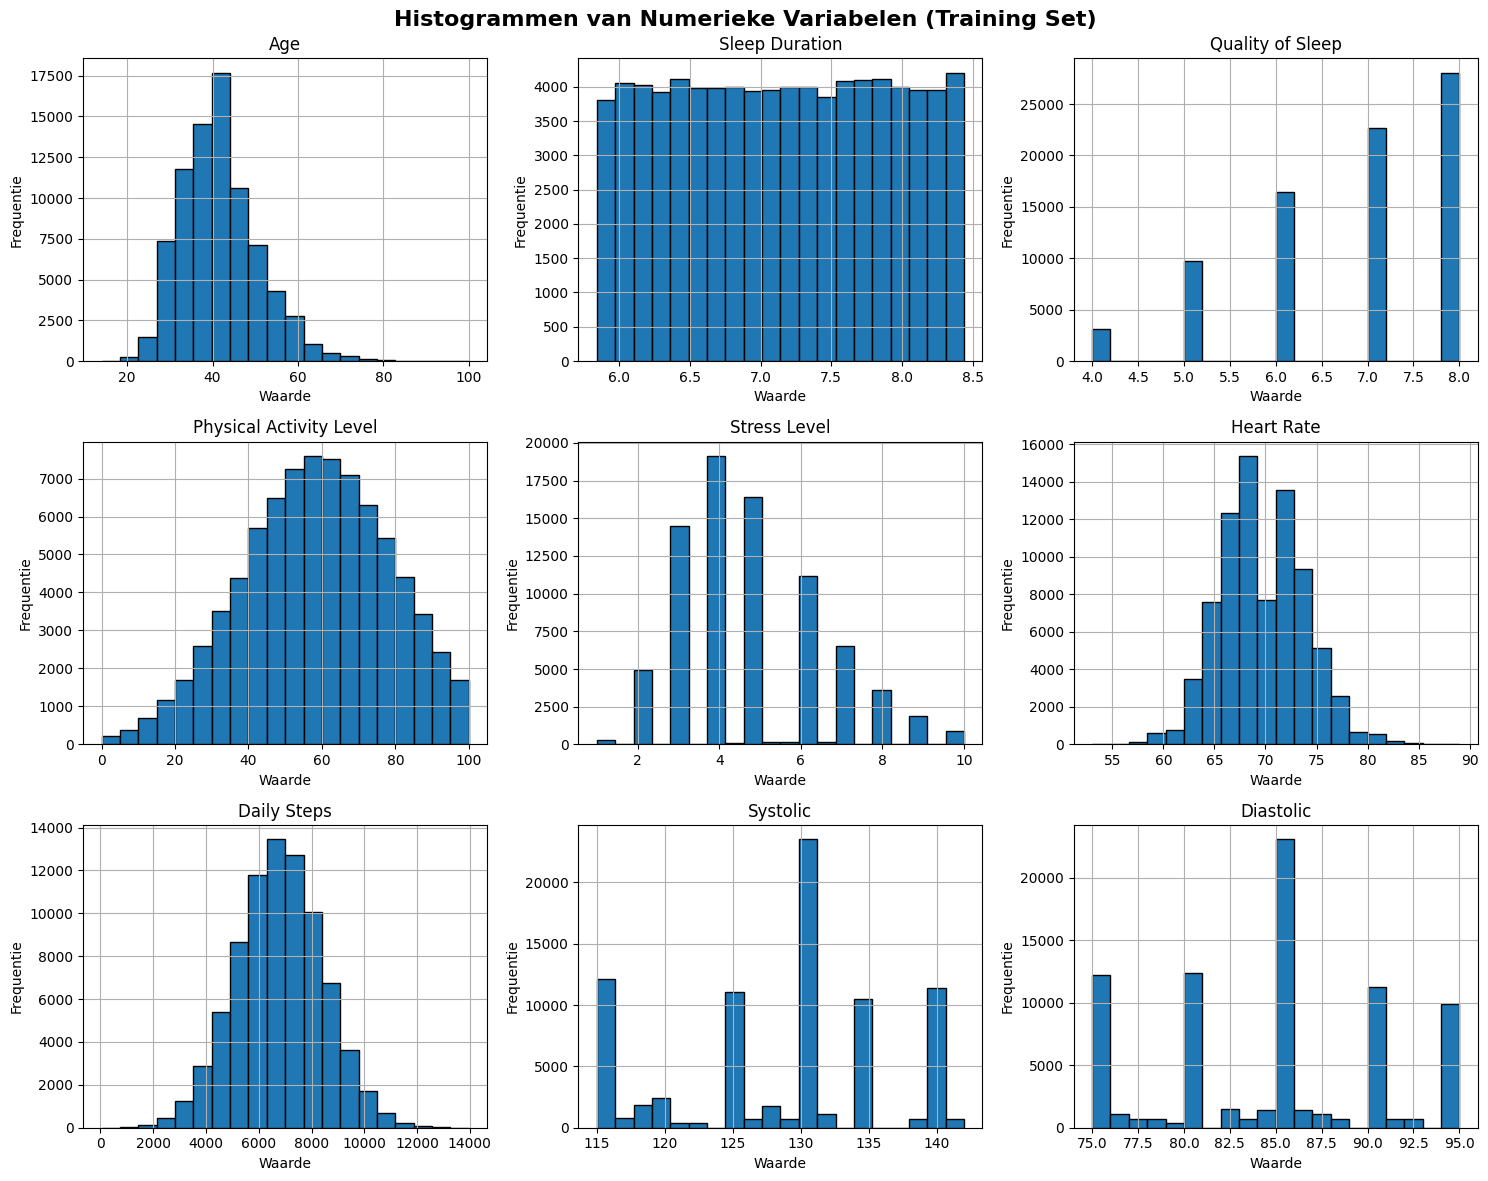


INTERPRETATIE VAN DISTRIBUTIES:

- Sleep Duration: 
  - Normalish verdeling rond 7-8 uur (verwacht patroon)
  - Mogelijk bimodaal (twee pieken: normale slapers vs insomnia)

- Quality of Sleep: 
  - Concentratie rond hogere waarden (7-9)
  - Linker staart: slaapstoornis patiënten

- Stress Level: 
  - Spreiding over gehele schaal (1-10)
  - Mogelijk uniform of licht rechts-scheef

- Physical Activity Level: 
  - Variatie in activiteitsniveaus
  - Check of correlatie met Daily Steps (multicollineariteit)

- Heart Rate: 
  - Concentratie rond 70-80 bpm (normaal rustritme)
  - Rechter staart: mogelijk sleep apnea patiënten

- Daily Steps: 
  - Rechtse scheefheid (veel lage waarden, enkele zeer hoge)
  - Extreme waarden (>15000) mogelijk tracking fouten of atleten

- BMI:
  - Rechts-scheve verdeling (normale populatie + obese groep)
  - Verwacht patroon voor algemene populatie

- Age:
  - Spreiding over volwassen leeftijden
  - Check of ouderen oververtegenwoordigd in sleep apnea groep




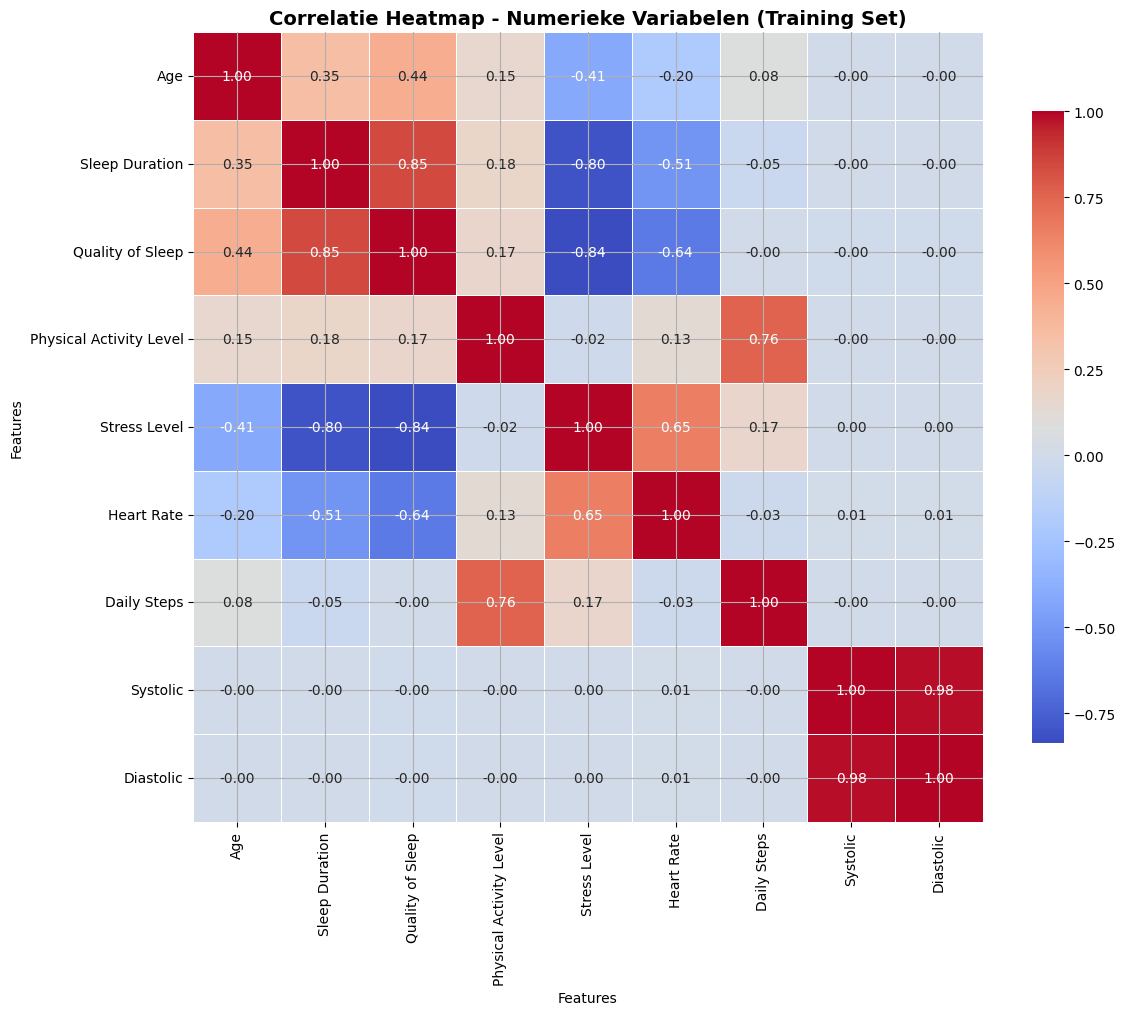


Sterk gecorreleerde variabelen (|r| > 0.7):

⚠️ MULTICOLLINEARITEIT GEDETECTEERD:
  • Sleep Duration ↔ Quality of Sleep: r = 0.847
  • Sleep Duration ↔ Stress Level: r = -0.804
  • Quality of Sleep ↔ Stress Level: r = -0.835
  • Physical Activity Level ↔ Daily Steps: r = 0.761
  • Systolic ↔ Diastolic: r = 0.979

💡 AANBEVELING: Overweeg één van deze features te verwijderen in feature selection fase.

PAIRPLOT - RELATIES TUSSEN BELANGRIJKE VARIABELEN (TRAINING SET)

Pairplot van 6 belangrijkste variabelen
Dit helpt om non-lineaire relaties en clusters te identificeren.
Kleuren tonen verschillende Sleep Disorder klassen.



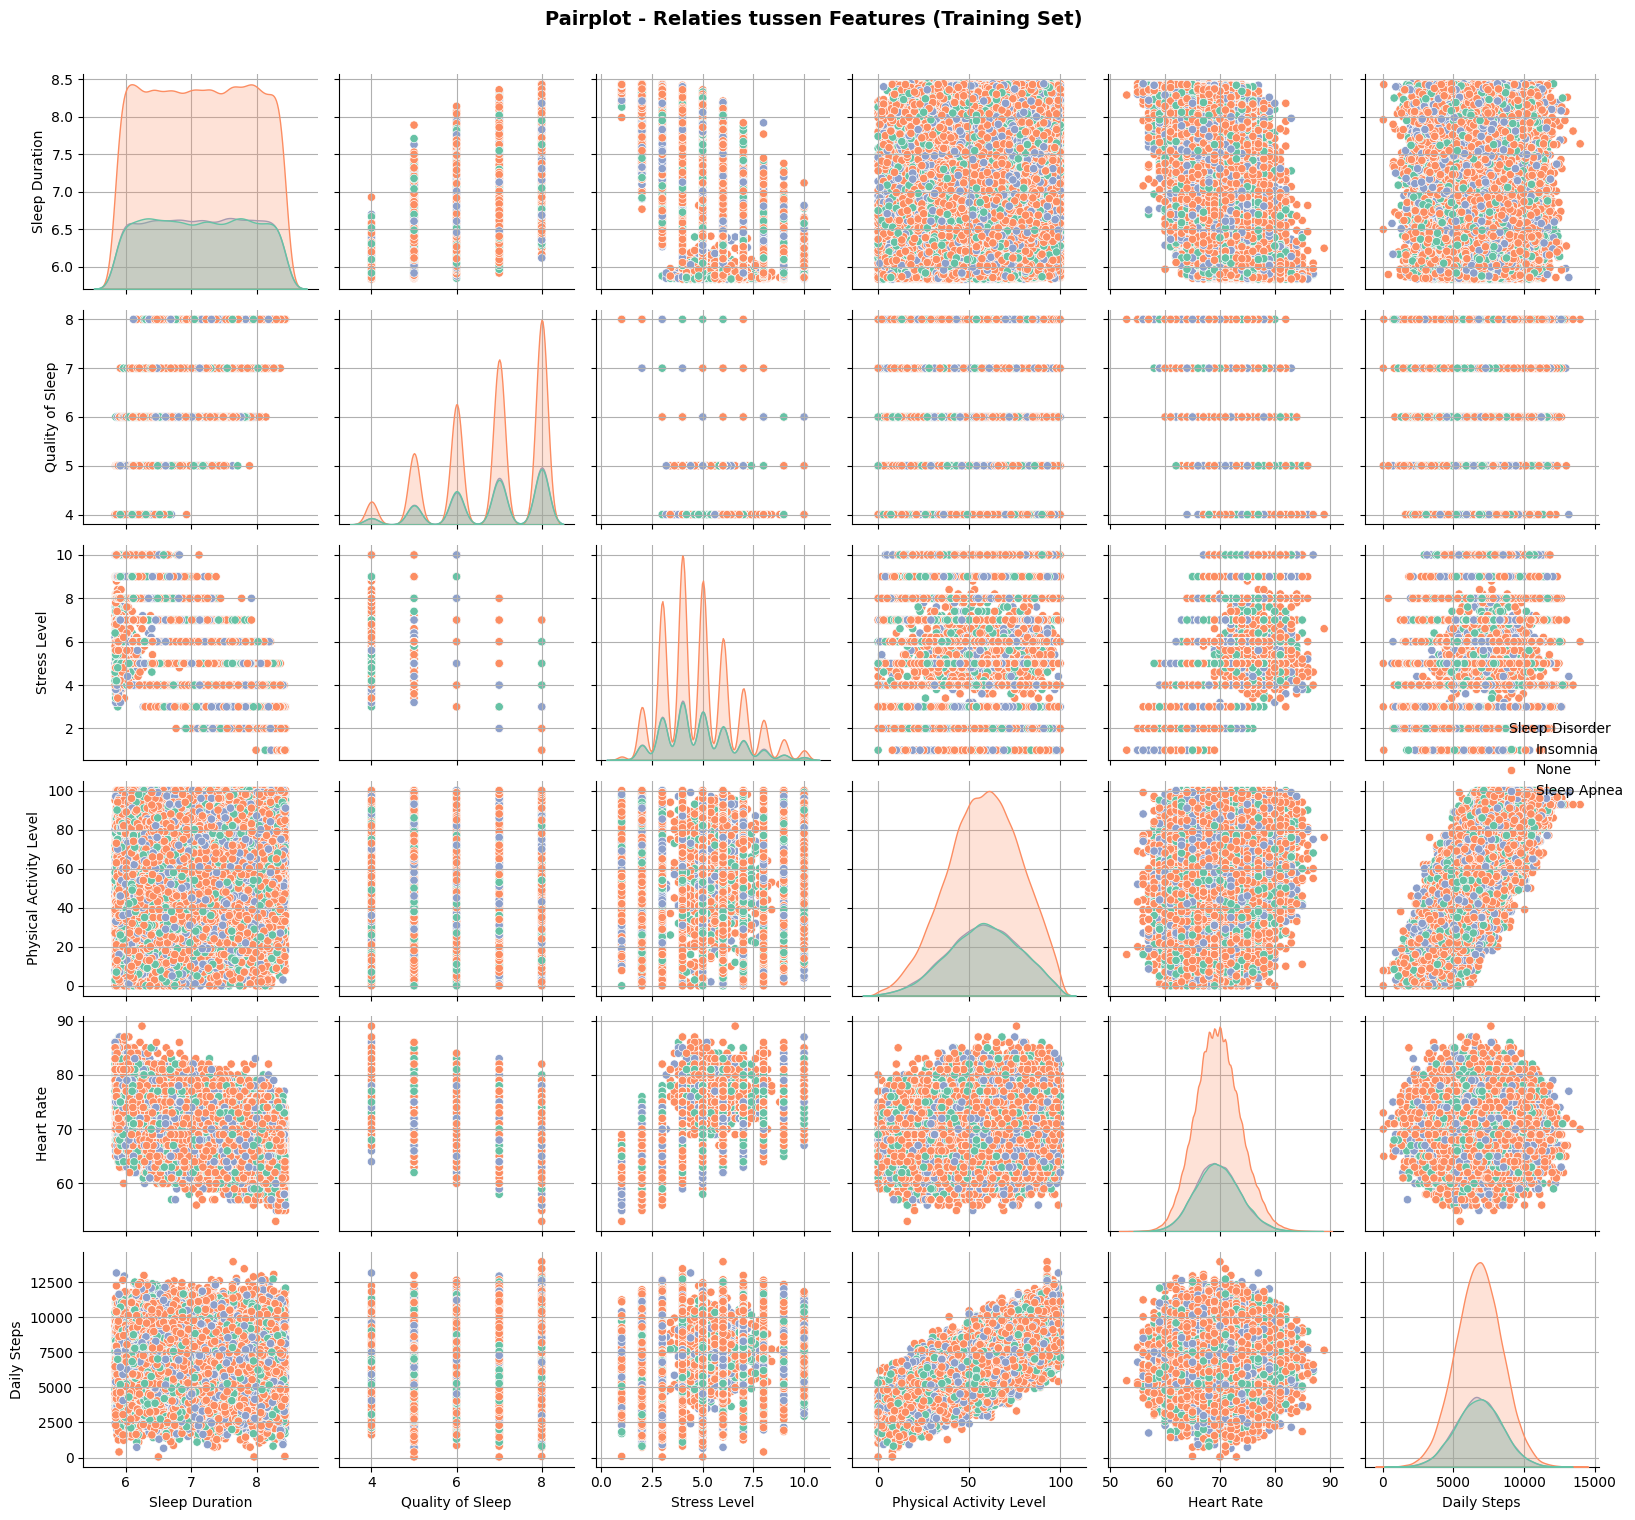


INTERPRETATIE PAIRPLOT:

LET OP:
- Clusters per kleur: duidelijke scheiding tussen klassen = goede feature
- Overlap tussen kleuren: moeilijk te onderscheiden klassen
- Diagonaal (KDE plots): distributie per klasse
- Off-diagonal scatter plots: bivariate relaties

VERWACHT:
- BMI vs Heart Rate: mogelijk cluster voor sleep apnea (hoog BMI + hoge HR)
- Quality of Sleep vs Sleep Duration: positieve correlatie
- Stress Level vs Quality of Sleep: negatieve correlatie


✓ EDA VOLTOOID OP TRAINING SET

Belangrijkste bevindingen worden gebruikt voor:
  • Outlier behandeling (stap 8)
  • Feature selection (stap 11)
  • Model keuze en interpretatie


In [80]:
# ============================================================================
# STAP 7: EXPLORATIEVE DATA ANALYSE (EDA)
# ============================================================================
print("\n" + "="*80)
print("STAP 7: EXPLORATIEVE DATA ANALYSE (EDA)")
print("="*80)

print("""
BELANGRIJK: EDA wordt uitgevoerd op de TRAINING SET
====================================================

Na de train-test split in stap 6, voeren we alle analyses uit op de training data.
De test set blijft 'ongezien' om data leakage te voorkomen.

Dit betekent:
- Distributies → berekend op train
- Correlaties → berekend op train  
- Outlier grenzen → bepaald op train (en toegepast op test in stap 8)
- Feature statistics → berekend op train
""")

# Combineer X_train en y_train voor analyse
df_train = X_train.copy()
df_train['Sleep Disorder'] = y_train.values

print(f"\nTraining set voor EDA: {df_train.shape[0]} samples × {df_train.shape[1]} kolommen")

# ============================================================================
# FEATURE IMPORTANCE - WAAROM ZIJN DEZE FEATURES BELANGRIJK?
# ============================================================================
print("\n" + "="*80)
print("FEATURE IMPORTANCE - KLINISCHE RATIONALE")
print("="*80)

print("""
WAAROM ZIJN DEZE FEATURES BELANGRIJK VOOR SLAAPSTOORNIS CLASSIFICATIE?
========================================================================

1. SLEEP DURATION (Slaapduur) 
   • Primaire indicator van slaapstoornissen
   • Insomnia: <6 uur per nacht (chronisch slaaptekort)
   • Sleep Apnea: vaak normale duur, maar gefragmenteerde slaap
   • Verwachting: Duidelijk verschil tussen klassen

2. QUALITY OF SLEEP (Slaapkwaliteit) 
   • Subjectieve maat (self-reported, schaal 1-10)
   • Capteert ervaren slaapkwaliteit die objectieve metingen kunnen missen
   • Lage score bij BEIDE insomnia en sleep apnea
   • Verwachting: Sterkste predictor voor aanwezigheid slaapstoornis

3. STRESS LEVEL (Stressniveau) - 
   • Chronische stress → verhoogd cortisol → verstoord circadiaans ritme
   • Bidirectionele relatie: stress → slechte slaap → meer stress
   • Vooral relevant voor insomnia (hyperarousal)
   • Verwachting: Hoog bij insomnia, gemiddeld bij sleep apnea

4. PHYSICAL ACTIVITY LEVEL (Fysieke Activiteit) - 
   • Regelmatige beweging verbetert slaapkwaliteit (adenosine opbouw)
   • Te weinig activiteit → verstoorde slaap-waak cyclus
   • Te veel (overtraining) → verhoogde cortisol
   • Verwachting: Lagere waarden geassocieerd met slaapstoornissen

5. HEART RATE (Hartslag) -
   • Verhoogd bij sleep apnea: repetitieve zuurstoftekort episodes → sympathische activatie
   • Normaal tot laag bij insomnia (compensatiemechanisme)
   • Discriminerende feature: kan sleep apnea onderscheiden van insomnia
   • Verwachting: Significant hogere HR bij sleep apnea patiënten

6. DAILY STEPS (Dagelijkse Stappen) -
   • Proxy voor algemene fysieke activiteit en lifestyle
   • Correleert met Physical Activity Level (mogelijke multicollineariteit)
   • Sedentair gedrag geassocieerd met slaapproblemen
   • Verwachting: Lagere stappen bij beide slaapstoornissen

7. BMI (Body Mass Index)
   • Obesitas (BMI >30) = grootste risicofactor voor obstructieve sleep apnea
   • Mechanisme: verhoogd weefsel in luchtwegen → obstructie
   • Minder relevant voor insomnia (meer psychologische factoren)
   • Verwachting: Sterk verhoogd specifiek in sleep apnea groep

8. BLOOD PRESSURE (Bloeddruk) - 
   • Hypertensie sterk geassocieerd met sleep apnea
   • Chronische zuurstoftekort → chronische sympathische activatie
   • Kan ook verhoogd zijn bij chronische stress (insomnia)
   • Verwachting: Hogere waarden bij sleep apnea, ook mogelijk bij insomnia

9. AGE (Leeftijd) -
   • Prevalentie sleep apnea neemt toe met leeftijd (weefselverlies, verminderde spierspanning)
   • Insomnia prevalentie meer variabel over levensfasen
   • Hormonale veranderingen (menopauze) beïnvloeden slaap
   • Verwachting: Sleep apnea groep gemiddeld ouder

10. GENDER (Geslacht) -
    • Mannen: 2-3x hogere kans op sleep apnea (anatomische verschillen)
    • Vrouwen: hogere prevalentie insomnia (hormonale factoren, stress)
    • Belangrijke stratificatie variabele
    • Verwachting: Gender als moderator voor type slaapstoornis

11. OCCUPATION (Beroep) - 
    • Shift werk → verstoord circadiaans ritme → insomnia
    • Stress-intensive beroepen → hogere insomnia prevalentie
    • Sedentair werk → risico op obesitas → sleep apnea
    • Verwachting: Bepaalde beroepen correleren met specifieke stoornissen

12. BMI CATEGORY (BMI Categorie) - 
    • Ordinale versie van BMI (Normal/Overweight/Obese)
    • Mogelijk redundant → overweeg feature selection
    • Overweight/Obese: directe link met sleep apnea
    • Verwachting: Mogelijk te verwijderen vanwege multicollineariteit met BMI

SAMENVATTING TOP PREDICTORS:
- Quality of Sleep: algemene indicator voor ALLE slaapstoornissen
- BMI: specifiek voor sleep apnea
- Heart Rate: discrimineert tussen sleep apnea vs insomnia
- Sleep Duration: algemene indicator voor ernst van problematiek
- Stress Level: specifiek voor insomnia
""")

# ============================================================================
# GEMIDDELDE FEATURE WAARDEN PER SLEEP DISORDER KLASSE
# ============================================================================
print("\n" + "="*80)
print("PER-KLASSE ANALYSE - VERSCHILLEN TUSSEN GROEPEN")
print("="*80)

print("\nDeze analyse toont gemiddelde feature waarden per Sleep Disorder klasse.")
print("Grote verschillen tussen klassen duiden op discriminerende features.\n")

for col in num_cols:
    print("\n" + "-"*80)
    print(f"FEATURE: {col}")
    print("-"*80)
    
    # Bereken statistics per klasse
    class_stats = df_train.groupby('Sleep Disorder')[col].agg([
        ('Mean', 'mean'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Count', 'count')
    ]).round(2)
    
    display(class_stats)
    
    # Interpretatie
    means = df_train.groupby('Sleep Disorder')[col].mean()
    max_class = means.idxmax()
    min_class = means.idxmin()
    difference = means.max() - means.min()
    
    print(f"\n INTERPRETATIE:")
    print(f"  • Hoogste gemiddelde: '{max_class}' = {means[max_class]:.2f}")
    print(f"  • Laagste gemiddelde: '{min_class}' = {means[min_class]:.2f}")
    print(f"  • Verschil: {difference:.2f} ({(difference/means.mean())*100:.1f}% van gemiddelde)")
    
    # Conclusie
    if difference / means.mean() > 0.2:  # >20% verschil
        print(f"  ✓ STERKE DISCRIMINERENDE FEATURE (>20% verschil)")
    elif difference / means.mean() > 0.1:  # 10-20% verschil
        print(f"  → Matige discriminerende feature (10-20% verschil)")
    else:
        print(f"  ⚠ Zwakke discriminerende feature (<10% verschil)")

# ============================================================================
# DISTRIBUTIE VAN NUMERIEKE VARIABELEN
# ============================================================================
print("\n" + "="*80)
print("DISTRIBUTIE VAN NUMERIEKE VARIABELEN (TRAINING SET)")
print("="*80)

# Maak histogrammen van TRAIN data
axes = df_train[num_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histogrammen van Numerieke Variabelen (Training Set)", 
             fontsize=16, fontweight='bold')

try:
    ax_list = axes.flatten()
except Exception:
    ax_list = [axes] if hasattr(axes, 'get_axes') else list(axes)
    
for ax in ax_list:
    ax.set_xlabel('Waarde')
    ax.set_ylabel('Frequentie')
    
plt.tight_layout()
plt.show()

print("""
INTERPRETATIE VAN DISTRIBUTIES:
================================

- Sleep Duration: 
  - Normalish verdeling rond 7-8 uur (verwacht patroon)
  - Mogelijk bimodaal (twee pieken: normale slapers vs insomnia)
  
- Quality of Sleep: 
  - Concentratie rond hogere waarden (7-9)
  - Linker staart: slaapstoornis patiënten
  
- Stress Level: 
  - Spreiding over gehele schaal (1-10)
  - Mogelijk uniform of licht rechts-scheef
  
- Physical Activity Level: 
  - Variatie in activiteitsniveaus
  - Check of correlatie met Daily Steps (multicollineariteit)
  
- Heart Rate: 
  - Concentratie rond 70-80 bpm (normaal rustritme)
  - Rechter staart: mogelijk sleep apnea patiënten
  
- Daily Steps: 
  - Rechtse scheefheid (veel lage waarden, enkele zeer hoge)
  - Extreme waarden (>15000) mogelijk tracking fouten of atleten
  
- BMI:
  - Rechts-scheve verdeling (normale populatie + obese groep)
  - Verwacht patroon voor algemene populatie
  
- Age:
  - Spreiding over volwassen leeftijden
  - Check of ouderen oververtegenwoordigd in sleep apnea groep
""")

# ============================================================================
# CORRELATIE ANALYSE
# ============================================================================
print("\n" + "="*80)
print("CORRELATIE ANALYSE (TRAINING SET)")
print("="*80)

print("\nCorrelatiematrix geeft inzicht in lineaire relaties tussen variabelen.")
print("Hoge correlaties tussen features kunnen wijzen op multicollineariteit.\n")

plt.figure(figsize=(12, 10))
correlation_matrix = df_train[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlatie Heatmap - Numerieke Variabelen (Training Set)", 
          fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Identificeer sterke correlaties (|r| > 0.7, exclusief diagonaal)
print("\nSterk gecorreleerde variabelen (|r| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if strong_correlations:
    print("\n⚠️ MULTICOLLINEARITEIT GEDETECTEERD:")
    for corr in strong_correlations:
        print(f"  • {corr['Var1']} ↔ {corr['Var2']}: r = {corr['Correlation']:.3f}")
    print("\n💡 AANBEVELING: Overweeg één van deze features te verwijderen in feature selection fase.")
else:
    print("  ✓ Geen sterke correlaties gevonden (geen multicollineariteit issues)")

# ============================================================================
# PAIRPLOT - RELATIES TUSSEN BELANGRIJKE VARIABELEN
# ============================================================================
print("\n" + "="*80)
print("PAIRPLOT - RELATIES TUSSEN BELANGRIJKE VARIABELEN (TRAINING SET)")
print("="*80)

# Selecteer subset voor pairplot (anders te groot)
cols_for_pairplot = [
    'Sleep Duration',
    'Quality of Sleep',
    'Stress Level',
    'Physical Activity Level',
    'Heart Rate',
    'Daily Steps'
]
cols_for_pairplot = [c for c in cols_for_pairplot if c in df_train.columns]

print(f"\nPairplot van {len(cols_for_pairplot)} belangrijkste variabelen")
print("Dit helpt om non-lineaire relaties en clusters te identificeren.")
print("Kleuren tonen verschillende Sleep Disorder klassen.\n")

sns.pairplot(df_train[cols_for_pairplot + ['Sleep Disorder']], 
             hue='Sleep Disorder', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot - Relaties tussen Features (Training Set)", 
             y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("""
INTERPRETATIE PAIRPLOT:
======================

LET OP:
- Clusters per kleur: duidelijke scheiding tussen klassen = goede feature
- Overlap tussen kleuren: moeilijk te onderscheiden klassen
- Diagonaal (KDE plots): distributie per klasse
- Off-diagonal scatter plots: bivariate relaties

VERWACHT:
- BMI vs Heart Rate: mogelijk cluster voor sleep apnea (hoog BMI + hoge HR)
- Quality of Sleep vs Sleep Duration: positieve correlatie
- Stress Level vs Quality of Sleep: negatieve correlatie
""")

print("\n" + "="*80)
print("✓ EDA VOLTOOID OP TRAINING SET")
print("="*80)
print("\nBelangrijkste bevindingen worden gebruikt voor:")
print("  • Outlier behandeling (stap 8)")
print("  • Feature selection (stap 11)")
print("  • Model keuze en interpretatie")


STAP 8: OUTLIER DETECTIE EN BEHANDELING

METHODOLOGIE: IQR (INTERQUARTILE RANGE) METHODE

De IQR-methode definieert outliers als waarden die buiten de volgende grenzen vallen:
- Lower bound = Q1 - 1.5 × IQR
- Upper bound = Q3 + 1.5 × IQR

KRITISCHE VRAAG: MOETEN WE OUTLIERS VERWIJDEREN?

In dit project verwijderen we outliers niet automatisch. In plaats daarvan passen we een conservatieve
capping/winsorization toe: zeer hoge of lage waarden worden begrensd tot een minimum of maximum.
Op deze manier behouden we alle observaties (belangrijk in medische datasets), maar verminderen
we de invloed van onrepresentatieve uitschieters op het model.

BELANGRIJK: DATA LEAKAGE PREVENTIE

We berekenen outlier grenzen (Q1, Q3, IQR) ALLEEN op TRAINING data.
Deze grenzen worden vervolgens toegepast op ZOWEL train ALS test data.

Werkwijze:
1. Bereken Q1, Q3, IQR op X_train
2. Bepaal lower/upper bounds op basis van train statistics
3. Pas capping toe op X_train met deze grenzen
4. Pas DEZELFDE grenzen

,count,pct,lower,upper,Q1,Q3,IQR
Heart Rate,1153,1.44125,59.50,79.50,67.00,72.00,5.0
Age,1011,1.26375,17.00,65.00,35.00,47.00,12.0
Stress Level,916,1.14500,1.00,9.00,4.00,6.00,2.0
Daily Steps,601,0.75125,2381.00,11189.00,5684.00,7886.00,2202.0
Physical Activity Level,95,0.11875,2.00,114.00,44.00,72.00,28.0
Sleep Duration,0,0.00000,4.54,9.74,6.49,7.79,1.3
Quality of Sleep,0,0.00000,3.00,11.00,6.00,8.00,2.0
Systolic,0,0.00000,110.00,150.00,125.00,135.00,10.0
Diastolic,0,0.00000,65.00,105.00,80.00,90.00,10.0



--------------------------------------------------------------------------------
VISUALISATIE: BOXPLOTS VOOR OUTLIER DETECTIE (TRAINING SET)
--------------------------------------------------------------------------------


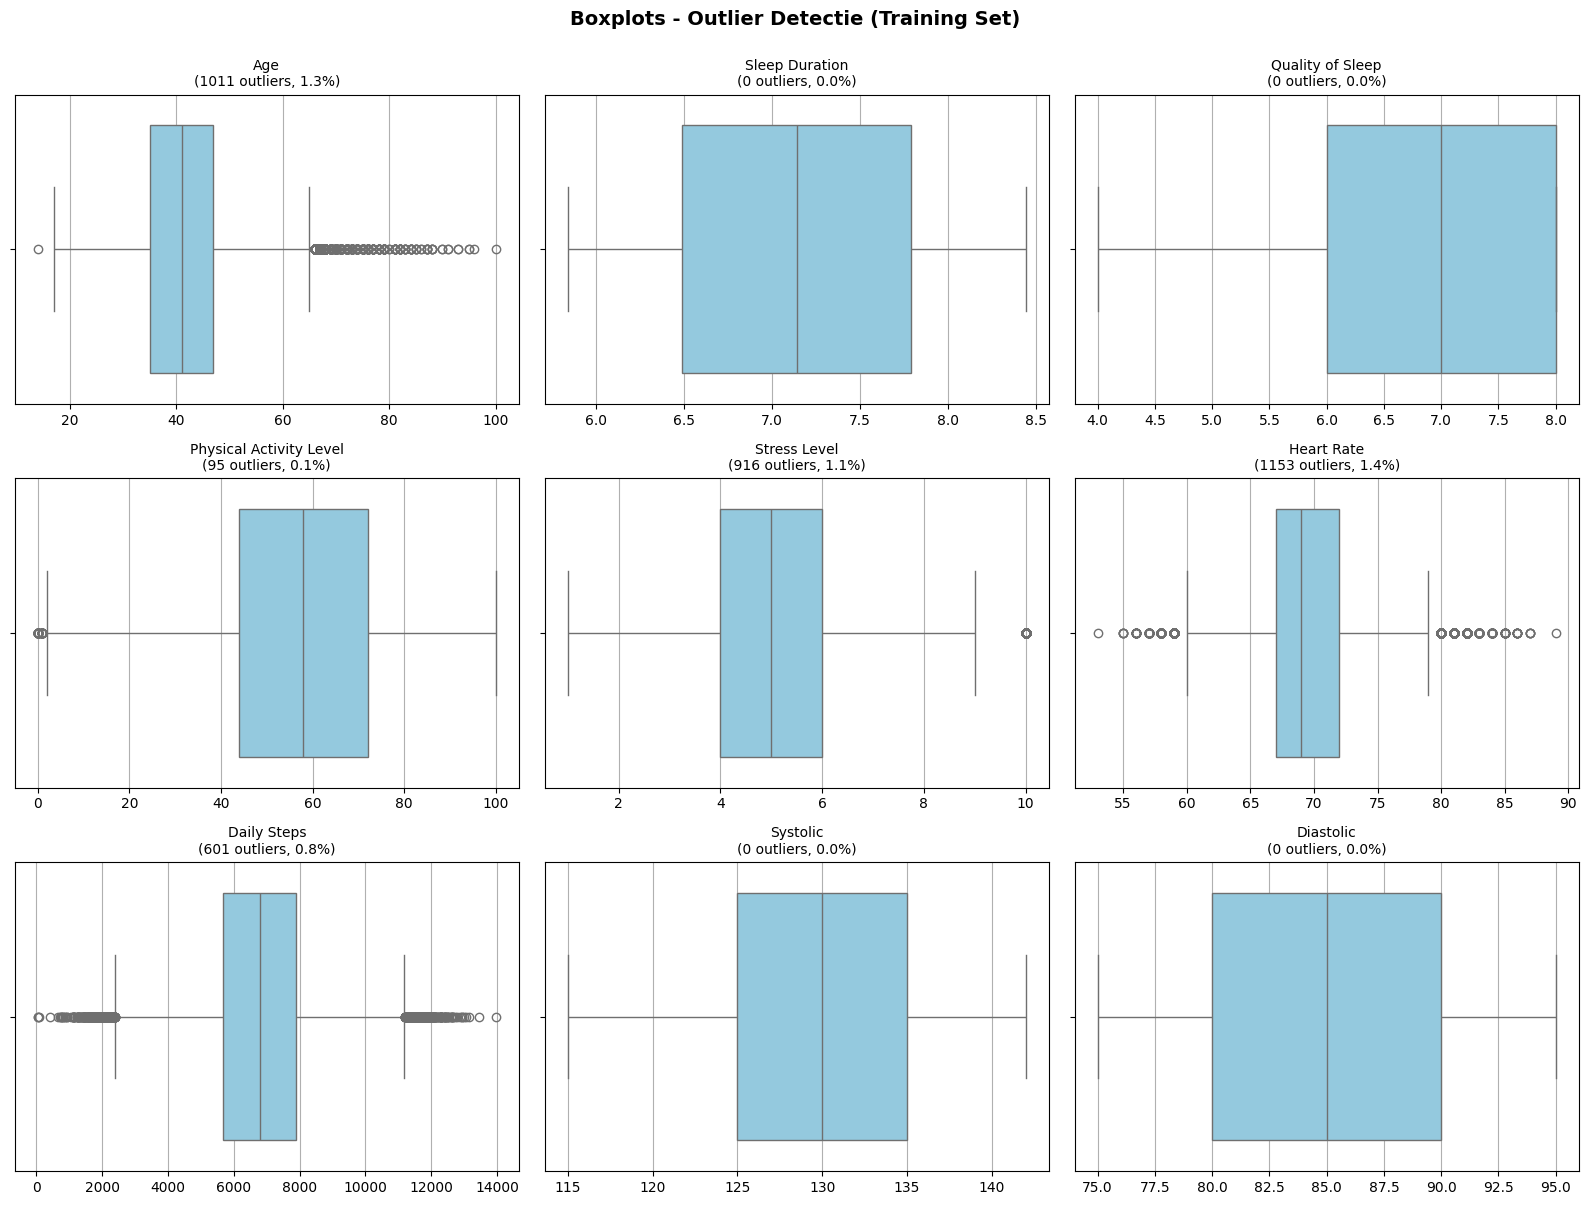


OUTLIER BEHANDELING STRATEGIE - GEFUNDEERDE BESLISSINGEN (CAPPING)

PRINCIPE: CONSERVATIEVE AANPAK

- We verwijderen geen rijen puur op basis van IQR-outliers.
- We gebruiken winsorization/clipping (capping) voor sterk scheve/dispersed variabelen
  en voor duidelijk onrealistische waarden.
- Dit behoudt klinisch relevante extreme cases, maar vermindert de invloed van meetfouten
  en ongebruikelijke uitschieters op modeltraining.

IMPLEMENTATIE:
1. Bepaal capping strategie per feature op basis van domeinkennis
2. Bereken grenzen op TRAIN set
3. Pas toe op TRAIN set
4. Pas DEZELFDE grenzen toe op TEST set


--------------------------------------------------------------------------------
IMPLEMENTATIE VAN BEHANDELING (CAPPING / WINSORIZATION)
--------------------------------------------------------------------------------

1. DAILY STEPS - Winsorization / Capping (1% - 99%)
----------------------------------------
   TRAIN originele range: 41 - 13960 stappen
   TEST originele range: 464 

In [81]:
# ============================================================================
# STAP 8: OUTLIER DETECTIE EN BEHANDELING - GEFUNDEERDE AANPAK 
# ============================================================================
print("\n" + "="*80)
print("STAP 8: OUTLIER DETECTIE EN BEHANDELING")
print("="*80)

print("""
METHODOLOGIE: IQR (INTERQUARTILE RANGE) METHODE
================================================

De IQR-methode definieert outliers als waarden die buiten de volgende grenzen vallen:
- Lower bound = Q1 - 1.5 × IQR
- Upper bound = Q3 + 1.5 × IQR

KRITISCHE VRAAG: MOETEN WE OUTLIERS VERWIJDEREN?
==================================================

In dit project verwijderen we outliers niet automatisch. In plaats daarvan passen we een conservatieve
capping/winsorization toe: zeer hoge of lage waarden worden begrensd tot een minimum of maximum.
Op deze manier behouden we alle observaties (belangrijk in medische datasets), maar verminderen
we de invloed van onrepresentatieve uitschieters op het model.

BELANGRIJK: DATA LEAKAGE PREVENTIE
===================================

We berekenen outlier grenzen (Q1, Q3, IQR) ALLEEN op TRAINING data.
Deze grenzen worden vervolgens toegepast op ZOWEL train ALS test data.

Werkwijze:
1. Bereken Q1, Q3, IQR op X_train
2. Bepaal lower/upper bounds op basis van train statistics
3. Pas capping toe op X_train met deze grenzen
4. Pas DEZELFDE grenzen toe op X_test (geen herberekening!)

Dit voorkomt data leakage: test set informatie beïnvloedt niet de train set.
""")

# ============================================================================
# STAP 8A: OUTLIER DETECTIE OP TRAINING SET
# ============================================================================
print("\n" + "-"*80)
print("OUTLIER IDENTIFICATIE PER VARIABELE (TRAINING SET)")
print("-"*80)

# Maak kopieën om originele data te behouden
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

# Identificeer numerieke kolommen in X_train
num_cols_train = X_train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nNumerieke features in training set: {len(num_cols_train)}")
print(f"Features: {num_cols_train}\n")

# Bereken outlier statistics op TRAIN data
outlier_info = {}
outlier_bounds = {}  # Opslaan voor toepassen op test set

for col in num_cols_train:
    # Bereken op TRAIN
    q1 = X_train_clean[col].quantile(0.25)
    q3 = X_train_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # Identificeer outliers in train
    mask = (X_train_clean[col] < lower) | (X_train_clean[col] > upper)
    outlier_count = int(mask.sum())
    outlier_pct = 100 * outlier_count / len(X_train_clean)
    
    # Opslaan voor rapportage
    outlier_info[col] = {
        'count': outlier_count,
        'pct': float(outlier_pct),
        'lower': float(lower),
        'upper': float(upper),
        'Q1': float(q1),
        'Q3': float(q3),
        'IQR': float(iqr)
    }
    
    # Opslaan bounds voor test set
    outlier_bounds[col] = {'lower': lower, 'upper': upper}

outlier_summary = pd.DataFrame.from_dict(outlier_info, orient='index')
outlier_summary = outlier_summary.sort_values('pct', ascending=False)

print("\nOutlier Samenvatting Training Set (gesorteerd op percentage):")
display(outlier_summary)

print("\n" + "-"*80)
print("VISUALISATIE: BOXPLOTS VOOR OUTLIER DETECTIE (TRAINING SET)")
print("-"*80)

n_cols_plot = len(num_cols_train)
n_rows = (n_cols_plot + 2) // 3  # Bereken aantal rijen nodig
n_cols = min(3, n_cols_plot)

plt.figure(figsize=(16, 4 * n_rows))
for i, col in enumerate(num_cols_train, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=X_train_clean[col], color='skyblue')
    title = f"{col}\n({outlier_summary.loc[col, 'count']:.0f} outliers, {outlier_summary.loc[col, 'pct']:.1f}%)"
    plt.title(title, fontsize=10)
    plt.xlabel('')
plt.suptitle("Boxplots - Outlier Detectie (Training Set)", fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ============================================================================
# STAP 8B: OUTLIER BEHANDELING - CAPPING/WINSORIZATION
# ============================================================================
print("\n" + "="*80)
print("OUTLIER BEHANDELING STRATEGIE - GEFUNDEERDE BESLISSINGEN (CAPPING)")
print("="*80)

print("""
PRINCIPE: CONSERVATIEVE AANPAK
=============================

- We verwijderen geen rijen puur op basis van IQR-outliers.
- We gebruiken winsorization/clipping (capping) voor sterk scheve/dispersed variabelen
  en voor duidelijk onrealistische waarden.
- Dit behoudt klinisch relevante extreme cases, maar vermindert de invloed van meetfouten
  en ongebruikelijke uitschieters op modeltraining.

IMPLEMENTATIE:
==============
1. Bepaal capping strategie per feature op basis van domeinkennis
2. Bereken grenzen op TRAIN set
3. Pas toe op TRAIN set
4. Pas DEZELFDE grenzen toe op TEST set
""")

print("\n" + "-"*80)
print("IMPLEMENTATIE VAN BEHANDELING (CAPPING / WINSORIZATION)")
print("-"*80)

# Strategie 1: Winsorization voor Daily Steps (1% - 99%)
if 'Daily Steps' in X_train_clean.columns:
    print("\n1. DAILY STEPS - Winsorization / Capping (1% - 99%)")
    print("-" * 40)
    
    # TRAIN: bereken percentiles
    low_p_train = X_train_clean['Daily Steps'].quantile(0.01)
    high_p_train = X_train_clean['Daily Steps'].quantile(0.99)
    
    # Toon originele ranges
    original_min_train = X_train_clean['Daily Steps'].min()
    original_max_train = X_train_clean['Daily Steps'].max()
    original_min_test = X_test_clean['Daily Steps'].min()
    original_max_test = X_test_clean['Daily Steps'].max()
    
    print(f"   TRAIN originele range: {original_min_train:.0f} - {original_max_train:.0f} stappen")
    print(f"   TEST originele range: {original_min_test:.0f} - {original_max_test:.0f} stappen")
    print(f"   Capping grenzen (van train): {low_p_train:.0f} - {high_p_train:.0f} stappen")
    
    # Pas capping toe op TRAIN
    X_train_clean['Daily Steps'] = np.clip(X_train_clean['Daily Steps'], low_p_train, high_p_train)
    
    # Pas DEZELFDE grenzen toe op TEST
    X_test_clean['Daily Steps'] = np.clip(X_test_clean['Daily Steps'], low_p_train, high_p_train)
    
    print(f"   ✓ Capping toegepast op train ({len(X_train_clean)} samples)")
    print(f"   ✓ DEZELFDE grenzen toegepast op test ({len(X_test_clean)} samples)")
    print("   Rationale: Extreme waarden kunnen tracking fouten zijn. Winsorization behoudt data maar beperkt invloed.")

# Strategie 2: Heart Rate - capping naar plausibele range (40 - 120 bpm)
if 'Heart Rate' in X_train_clean.columns:
    print("\n2. HEART RATE - Capping naar plausibele range (40 - 120 bpm)")
    print("-" * 40)
    
    # Medische plausibiliteitsgrenzen (domeinkennis)
    hr_lower, hr_upper = 40, 120
    
    # Toon originele ranges
    original_hr_min_train = X_train_clean['Heart Rate'].min()
    original_hr_max_train = X_train_clean['Heart Rate'].max()
    original_hr_min_test = X_test_clean['Heart Rate'].min()
    original_hr_max_test = X_test_clean['Heart Rate'].max()
    
    print(f"   TRAIN originele hartslag: {original_hr_min_train:.0f} - {original_hr_max_train:.0f} bpm")
    print(f"   TEST originele hartslag: {original_hr_min_test:.0f} - {original_hr_max_test:.0f} bpm")
    print(f"   Capping grenzen (medisch plausibel): {hr_lower} - {hr_upper} bpm")
    
    # Pas capping toe op TRAIN
    X_train_clean['Heart Rate'] = X_train_clean['Heart Rate'].clip(lower=hr_lower, upper=hr_upper)
    
    # Pas DEZELFDE grenzen toe op TEST
    X_test_clean['Heart Rate'] = X_test_clean['Heart Rate'].clip(lower=hr_lower, upper=hr_upper)
    
    print(f"   ✓ Capping toegepast op train ({len(X_train_clean)} samples)")
    print(f"   ✓ DEZELFDE grenzen toegepast op test ({len(X_test_clean)} samples)")
    print("   Rationale: Clipping behoudt observaties maar vermindert invloed van onrealistische uitschieters.")

# Strategie 3: Plausibiliteitscontroles (geen verwijdering, enkel rapportage)
print("\n3. ANDERE VARIABELEN - Plausibiliteitscheck (geen verwijdering)")
print("-" * 40)

# Sleep Duration (we behouden, want korte/lange slaap kan klinisch relevant zijn)
if 'Sleep Duration' in X_train_clean.columns:
    invalid_sleep_train = (X_train_clean['Sleep Duration'] < 0) | (X_train_clean['Sleep Duration'] > 24)
    invalid_sleep_test = (X_test_clean['Sleep Duration'] < 0) | (X_test_clean['Sleep Duration'] > 24)
    
    if invalid_sleep_train.sum() > 0 or invalid_sleep_test.sum() > 0:
        print(f"   ⚠ Sleep Duration: {invalid_sleep_train.sum()} train + {invalid_sleep_test.sum()} test waarden buiten 0-24 uur")
    else:
        print("   ✓ Sleep Duration: alle waarden binnen 0-24 uur (train + test)")

# BMI (optioneel)
if 'BMI' in X_train_clean.columns:
    invalid_bmi_train = (X_train_clean['BMI'] < 10) | (X_train_clean['BMI'] > 70)
    invalid_bmi_test = (X_test_clean['BMI'] < 10) | (X_test_clean['BMI'] > 70)
    
    if invalid_bmi_train.sum() > 0 or invalid_bmi_test.sum() > 0:
        print(f"   ⚠ BMI: {invalid_bmi_train.sum()} train + {invalid_bmi_test.sum()} test waarden buiten 10-70")
    else:
        print("   ✓ BMI waarden binnen plausibel bereik (train + test)")

# Age
if 'Age' in X_train_clean.columns:
    invalid_age_train = (X_train_clean['Age'] < 18) | (X_train_clean['Age'] > 100)
    invalid_age_test = (X_test_clean['Age'] < 18) | (X_test_clean['Age'] > 100)
    
    if invalid_age_train.sum() > 0 or invalid_age_test.sum() > 0:
        print(f"   ⚠ Age: {invalid_age_train.sum()} train + {invalid_age_test.sum()} test waarden buiten 18-100 jaar")
    else:
        print("   ✓ Age waarden binnen plausibel bereik (train + test)")

# ============================================================================
# STAP 8C: RESULTAAT VAN OUTLIER BEHANDELING
# ============================================================================
print("\n" + "-"*80)
print("RESULTAAT VAN OUTLIER BEHANDELING (CAPPING / WINSORIZATION)")
print("-"*80)

# We hebben geen rijen verwijderd; we hebben waarden gecapped/winsorized
rows_removed = 0
pct_removed = 0.0

print(f"\nTRAINING SET:")
print(f"  • Originele grootte: {X_train.shape[0]} rijen × {X_train.shape[1]} kolommen")
print(f"  • Na behandeling: {X_train_clean.shape[0]} rijen × {X_train_clean.shape[1]} kolommen")
print(f"  • Verwijderd: {rows_removed} rijen ({pct_removed:.2f}%)")

print(f"\nTEST SET:")
print(f"  • Originele grootte: {X_test.shape[0]} rijen × {X_test.shape[1]} kolommen")
print(f"  • Na behandeling: {X_test_clean.shape[0]} rijen × {X_test_clean.shape[1]} kolommen")
print(f"  • Verwijderd: {rows_removed} rijen ({pct_removed:.2f}%)")

print("\n✓ Geen rijen verwijderd - we hebben capping toegepast op extreme waarden")
print("✓ Outlier grenzen bepaald op TRAIN en toegepast op BEIDE sets (geen data leakage)")
print("✓ Extreme waarden beperkt via winsorization/clipping")

# Update de variabelen voor gebruik in volgende stappen
X_train = X_train_clean
X_test = X_test_clean

print("\n⚠️ X_train en X_test zijn nu updated met outlier behandeling")
print("   Deze worden gebruikt in volgende stappen (encoding, scaling)")

In [82]:
# ============================================================================
# STAP 9: FEATURE ENCODING - CATEGORISCHE VARIABELEN TRANSFORMEREN
# ============================================================================
print("\n" + "="*80)
print("STAP 9: FEATURE ENCODING - CATEGORISCHE VARIABELEN")
print("="*80)

print("""
WAAROM ENCODING NODIG IS:
=========================

Machine learning modellen werken met numerieke waarden. Categorische variabelen
zoals 'Gender' (Male/Female) of 'BMI Category' (Normal/Overweight/Obese) moeten
worden omgezet naar een numerieke representatie.

ENCODING METHODEN:
==================

1. LABEL ENCODING:
   • Ordinal categorieën: 'Low' → 0, 'Medium' → 1, 'High' → 2
   • Nadeel: impliceert orde/rangorde (2 > 1 > 0)
   • Gebruik alleen voor ordinale variabelen of target variabele

2. ONE-HOT ENCODING:
   • Nominale categorieën: 'Male' → [1,0], 'Female' → [0,1]
   • Voordeel: geen kunstmatige ordinale relatie
   • Nadeel: verhoogt dimensionaliteit (curse of dimensionality bij veel categorieën)
   • Drop_first=True om multicollineariteit te voorkomen (dummy variable trap)

ONZE AANPAK MET TRAIN-TEST SPLIT:
==================================

CRITICAL: Data Leakage Preventie
---------------------------------
- One-hot encoding: fit op TRAIN, transform op TEST
- Label encoding (target): fit op TRAIN, transform op TEST
- Encoder leert categorieën alleen van train data

Waarom?
- Test set kan nieuwe categorieën hebben die train niet heeft gezien
- Encoder moet consistent zijn tussen train en test
- Voorkomt dat test informatie lekt naar train

IMPLEMENTATIE:
==============
1. Identificeer categorische features in train
2. Fit encoder op train data
3. Transform zowel train als test met gefitte encoder
4. Target encoding: fit op y_train, transform beide
""")

# ============================================================================
# STAP 9A: IDENTIFICEER CATEGORISCHE FEATURES
# ============================================================================
print("\n" + "-"*80)
print("IDENTIFICATIE VAN CATEGORISCHE FEATURES")
print("-"*80)

# Identificeer categorische kolommen in X_train
cat_cols_train = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"\nCategorische features in training set ({len(cat_cols_train)}):")
for col in cat_cols_train:
    unique_vals_train = X_train[col].nunique()
    unique_vals_test = X_test[col].nunique()
    print(f"  • {col}:")
    print(f"    - Train: {unique_vals_train} categorieën → {X_train[col].unique().tolist()}")
    print(f"    - Test: {unique_vals_test} categorieën → {X_test[col].unique().tolist()}")

# Check voor nieuwe categorieën in test set (kunnen problemen geven)
print("\n⚠️ CONTROLE: Nieuwe categorieën in test set?")
for col in cat_cols_train:
    train_cats = set(X_train[col].unique())
    test_cats = set(X_test[col].unique())
    new_cats = test_cats - train_cats
    
    if new_cats:
        print(f"  ⚠️ {col}: Test heeft nieuwe categorieën: {new_cats}")
        print(f"     → Deze worden behandeld als 'unknown' tijdens encoding")
    else:
        print(f"  ✓ {col}: Geen nieuwe categorieën in test")

# ============================================================================
# STAP 9B: ONE-HOT ENCODING VOOR FEATURES
# ============================================================================
print("\n" + "-"*80)
print("ONE-HOT ENCODING VOOR FEATURES")
print("-"*80)

print("""
METHODE: pd.get_dummies() met align
====================================

We gebruiken pandas get_dummies() omdat het eenvoudig is, maar we moeten
zorgen dat train en test dezelfde kolommen hebben na encoding.

Proces:
1. Encode train set → krijg dummy kolommen
2. Encode test set → krijg dummy kolommen
3. Align beide sets zodat ze identieke kolommen hebben
4. Missende kolommen in test worden gevuld met 0

Alternatief: sklearn OneHotEncoder met handle_unknown='ignore'
""")

print(f"\nVOOR encoding:")
print(f"  • X_train: {X_train.shape[0]} rijen × {X_train.shape[1]} kolommen")
print(f"  • X_test: {X_test.shape[0]} rijen × {X_test.shape[1]} kolommen")

# One-hot encoding op TRAIN
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols_train, drop_first=True)

# One-hot encoding op TEST (met dezelfde kolommen)
X_test_encoded = pd.get_dummies(X_test, columns=cat_cols_train, drop_first=True)

print(f"\nNA encoding (voor align):")
print(f"  • X_train_encoded: {X_train_encoded.shape[0]} rijen × {X_train_encoded.shape[1]} kolommen")
print(f"  • X_test_encoded: {X_test_encoded.shape[0]} rijen × {X_test_encoded.shape[1]} kolommen")

# BELANGRIJK: Align zodat beide sets dezelfde kolommen hebben
# Kolommen die in train maar niet in test zitten → voeg toe aan test met 0
# Kolommen die in test maar niet in train zitten → verwijder uit test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

print(f"\nNA align (train en test hebben nu IDENTIEKE kolommen):")
print(f"  • X_train_encoded: {X_train_encoded.shape[0]} rijen × {X_train_encoded.shape[1]} kolommen")
print(f"  • X_test_encoded: {X_test_encoded.shape[0]} rijen × {X_test_encoded.shape[1]} kolommen")

# Toon nieuwe kolommen
new_cols = [col for col in X_train_encoded.columns if col not in X_train.columns]
print(f"\nNieuwe dummy kolommen gecreëerd ({len(new_cols)}):")
for col in new_cols[:15]:  # Toon eerste 15
    print(f"  • {col}")
if len(new_cols) > 15:
    print(f"  ... en {len(new_cols) - 15} meer")

print("\n✓ One-hot encoding voltooid")
print("✓ Train en test hebben identieke kolommen")

# ============================================================================
# STAP 9C: LABEL ENCODING VOOR TARGET VARIABELE
# ============================================================================
print("\n" + "-"*80)
print("LABEL ENCODING VOOR TARGET VARIABELE")
print("-"*80)

print("""
Target encoding met sklearn LabelEncoder
=========================================

Process:
1. Fit encoder op y_train (leert de klassen)
2. Transform y_train → numerieke labels
3. Transform y_test met DEZELFDE encoder → numerieke labels

Dit garandeert consistente encoding tussen train en test.
""")

print(f"\nVOOR encoding:")
print(f"  • y_train: {y_train.shape[0]} samples, type: {y_train.dtype}")
print(f"  • y_test: {y_test.shape[0]} samples, type: {y_test.dtype}")

print(f"\nUnieke klassen in y_train: {sorted(y_train.unique())}")
print(f"Unieke klassen in y_test: {sorted(y_test.unique())}")

# Label encoding voor target
le = LabelEncoder()

# FIT op y_train (encoder leert de klassen van train data)
le.fit(y_train)

# TRANSFORM beide sets met gefitte encoder
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Converteer naar pandas Series voor consistentie
y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name='Sleep Disorder')
y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name='Sleep Disorder')

print(f"\nNA encoding:")
print(f"  • y_train_encoded: {y_train_encoded.shape[0]} samples, type: {y_train_encoded.dtype}")
print(f"  • y_test_encoded: {y_test_encoded.shape[0]} samples, type: {y_test_encoded.dtype}")

# Toon mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Encoding Mapping:")
for original, encoded in sorted(label_mapping.items(), key=lambda x: x[1]):
    count_train = (y_train_encoded == encoded).sum()
    count_test = (y_test_encoded == encoded).sum()
    print(f"  '{original}' → {encoded}")
    print(f"    - Train: {count_train} samples ({100*count_train/len(y_train_encoded):.1f}%)")
    print(f"    - Test: {count_test} samples ({100*count_test/len(y_test_encoded):.1f}%)")

print("\nRationale: Label encoding voor target is noodzakelijk voor sklearn classificatie.")
print("De numerieke waarden hebben geen ordinale betekenis in multiclass setting.")

# ============================================================================
# STAP 9D: VERIFICATIE EN SAMENVATTING
# ============================================================================
print("\n" + "-"*80)
print("VERIFICATIE EN SAMENVATTING")
print("-"*80)

print("\nEerste 5 rijen TRAINING set (features + target):")
display(pd.concat([X_train_encoded.head(), y_train_encoded.head()], axis=1))

print("\nEerste 5 rijen TEST set (features + target):")
display(pd.concat([X_test_encoded.head(), y_test_encoded.head()], axis=1))

print("\n" + "="*80)
print("✓ FEATURE ENCODING VOLTOOID")
print("="*80)

print("\nSamenvatting:")
print(f"  • Categorische features: {len(cat_cols_train)} → One-hot encoded")
print(f"  • Train features: {X_train.shape[1]} → {X_train_encoded.shape[1]} kolommen")
print(f"  • Test features: {X_test.shape[1]} → {X_test_encoded.shape[1]} kolommen")
print(f"  • Target variabele: Label encoded (3 klassen)")
print(f"  • Train samples: {X_train_encoded.shape[0]}")
print(f"  • Test samples: {X_test_encoded.shape[0]}")

print("\n⚠️ BELANGRIJK: Encoder fit op TRAIN, transform op TEST")
print("   Dit voorkomt data leakage!")

# Update variabelen voor volgende stappen
X_train = X_train_encoded
X_test = X_test_encoded
y_train = y_train_encoded
y_test = y_test_encoded

print("\n✓ X_train, X_test, y_train, y_test zijn nu ge-encoded")
print("   Deze worden gebruikt in volgende stappen (scaling, modeling)")

print("\n⚠️ MULTICOLLINEARITEIT BEHANDELING:")
print("Systolic en Diastolic correleren extreem hoog (r=0.979)")
print("We verwijderen Diastolic om redundantie te voorkomen.\n")

X_train = X_train.drop('Diastolic', axis=1)
X_test = X_test.drop('Diastolic', axis=1)

print(f"✓ Diastolic verwijderd")
print(f"  Nieuwe feature count: {X_train.shape[1]}")


STAP 9: FEATURE ENCODING - CATEGORISCHE VARIABELEN

WAAROM ENCODING NODIG IS:

Machine learning modellen werken met numerieke waarden. Categorische variabelen
zoals 'Gender' (Male/Female) of 'BMI Category' (Normal/Overweight/Obese) moeten
worden omgezet naar een numerieke representatie.

ENCODING METHODEN:

1. LABEL ENCODING:
   • Ordinal categorieën: 'Low' → 0, 'Medium' → 1, 'High' → 2
   • Nadeel: impliceert orde/rangorde (2 > 1 > 0)
   • Gebruik alleen voor ordinale variabelen of target variabele

2. ONE-HOT ENCODING:
   • Nominale categorieën: 'Male' → [1,0], 'Female' → [0,1]
   • Voordeel: geen kunstmatige ordinale relatie
   • Nadeel: verhoogt dimensionaliteit (curse of dimensionality bij veel categorieën)
   • Drop_first=True om multicollineariteit te voorkomen (dummy variable trap)

ONZE AANPAK MET TRAIN-TEST SPLIT:

CRITICAL: Data Leakage Preventie
---------------------------------
- One-hot encoding: fit op TRAIN, transform op TEST
- Label encoding (target): fit op TRAIN, tr

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Male,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder
35633,50.0,7.48,7,53.0,5.0,71,6634.0,115,75,True,...,False,False,False,False,False,False,False,False,False,0
76180,32.0,5.98,5,56.0,8.0,67,8841.0,140,95,True,...,False,False,False,False,False,False,False,False,True,1
98813,55.0,6.55,7,47.0,6.0,71,6456.0,130,85,True,...,True,False,False,False,False,False,False,False,False,1
3031,27.0,6.50,5,88.0,7.0,72,9340.0,119,77,True,...,False,False,False,False,False,False,False,False,False,2
3543,40.0,6.38,5,24.0,6.0,72,4996.0,129,84,True,...,False,False,False,False,False,False,False,False,False,1



Eerste 5 rijen TEST set (features + target):


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Male,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder
54670,43.0,6.69,6,64.0,7.0,69,8947.0,128,85,True,...,False,False,False,False,False,True,False,False,True,2
91930,46.0,7.61,8,64.0,4.0,67,8566.0,125,80,True,...,False,True,False,False,False,False,False,False,True,1
94259,43.0,7.19,8,87.0,5.0,66,9120.0,139,91,True,...,True,False,False,False,False,False,False,False,True,1
78652,47.0,7.20,7,68.0,4.0,62,8482.0,130,85,True,...,True,False,False,False,False,False,False,False,True,2
46826,51.0,6.67,7,84.0,5.0,68,8620.0,130,85,False,...,False,False,True,False,False,False,False,False,True,2



✓ FEATURE ENCODING VOLTOOID

Samenvatting:
  • Categorische features: 3 → One-hot encoded
  • Train features: 12 → 23 kolommen
  • Test features: 12 → 23 kolommen
  • Target variabele: Label encoded (3 klassen)
  • Train samples: 80000
  • Test samples: 20000

⚠️ BELANGRIJK: Encoder fit op TRAIN, transform op TEST
   Dit voorkomt data leakage!

✓ X_train, X_test, y_train, y_test zijn nu ge-encoded
   Deze worden gebruikt in volgende stappen (scaling, modeling)

⚠️ MULTICOLLINEARITEIT BEHANDELING:
Systolic en Diastolic correleren extreem hoog (r=0.979)
We verwijderen Diastolic om redundantie te voorkomen.

✓ Diastolic verwijderd
  Nieuwe feature count: 22



STAP 10: FEATURE SCALING (STANDARDISATIE)

WAAROM FEATURE SCALING NODIG IS:

Variabelen hebben verschillende schalen:
- Daily Steps: 0 - 10,000+ 
- Quality of Sleep: 1 - 10
- Heart Rate: 50 - 100 bpm

PROBLEEM ZONDER SCALING:
- Distance-based modellen (KNN) worden gedomineerd door features met grote schaal
- Gradient descent convergeert langzamer
- Regularisatie (L1/L2) werkt niet eerlijk tussen features

METHODEN:

1. MIN-MAX NORMALISATIE (0-1 range):
   x_scaled = (x - x_min) / (x_max - x_min)
   • Voordeel: Behoudt distributie shape
   • Nadeel: Gevoelig voor outliers

2. STANDARDISATIE (Z-SCORE):
   x_scaled = (x - μ) / σ
   • Voordeel: Robuust tegen outliers, mean=0 en std=1
   • Nadeel: Geen vaste min/max
   • BEST PRACTICE voor de meeste ML algoritmen

ONZE KEUZE: StandardScaler (Z-score normalisatie)
- Geschikt voor variabelen met outliers (hebben we behandeld in stap 8)
- Werkt goed met tree-based modellen én lineaire modellen
- Industrie standaard in sklearn pipelines

CRITI

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Gender_Male,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
35633,50.0,7.48,7,53.0,5.0,71,6634.0,115,True,False,...,False,False,False,False,False,False,False,False,False,False
76180,32.0,5.98,5,56.0,8.0,67,8841.0,140,True,False,...,False,False,False,False,False,False,False,False,False,True
98813,55.0,6.55,7,47.0,6.0,71,6456.0,130,True,False,...,False,True,False,False,False,False,False,False,False,False
3031,27.0,6.50,5,88.0,7.0,72,9340.0,119,True,False,...,False,False,False,False,False,False,False,False,False,False
3543,40.0,6.38,5,24.0,6.0,72,4996.0,129,True,False,...,False,False,False,False,False,False,False,False,False,False



Descriptive statistics TRAIN VOOR scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,41.601233,7.140648,6.784825,57.902953,4.791230,69.582725,6782.532000,128.469488
std,8.931490,0.751099,1.161030,19.784283,1.756198,4.082936,1612.844543,7.968145
min,14.000000,5.840000,4.000000,0.000000,1.000000,53.000000,2926.990000,115.000000
25%,35.000000,6.490000,6.000000,44.000000,4.000000,67.000000,5684.000000,125.000000
50%,41.000000,7.140000,7.000000,58.000000,5.000000,69.000000,6788.000000,130.000000
75%,47.000000,7.790000,8.000000,72.000000,6.000000,72.000000,7886.000000,135.000000
max,100.000000,8.440000,8.000000,100.000000,10.000000,89.000000,10596.010000,142.000000



 Scaler Statistics (geleerd van TRAIN data):
  • Mean per feature (eerste 5): [41.6012325   7.14064837  6.784825   57.9029525   4.79123   ]
  • Std per feature (eerste 5): [ 8.93143432  0.75109384  1.16102313 19.7841595   1.75618737]

Voorbeeld TRAIN features NA scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Gender_Male,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
35633,0.940360,0.451810,0.185332,-0.247822,0.118877,0.347124,-0.092094,-1.690427,0.987059,-0.519773,...,-0.062673,-0.529324,-0.08627,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,-0.826185
76180,-1.074993,-1.545277,-1.537286,-0.096186,1.827123,-0.632570,1.276305,1.447085,0.987059,-0.519773,...,-0.062673,-0.529324,-0.08627,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,1.210383
98813,1.500181,-0.786384,0.185332,-0.551095,0.688292,0.347124,-0.202458,0.192080,0.987059,-0.519773,...,-0.062673,1.889201,-0.08627,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,-0.826185
3031,-1.634814,-0.852954,-1.537286,1.521270,1.257707,0.592047,1.585698,-1.188425,0.987059,-0.519773,...,-0.062673,-0.529324,-0.08627,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,-0.826185
3543,-0.179281,-1.012721,-1.537286,-1.713641,0.688292,0.592047,-1.107697,0.066580,0.987059,-0.519773,...,-0.062673,-0.529324,-0.08627,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,-0.826185



Descriptive statistics TRAIN NA scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Gender_Male,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,...,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,80000.000000,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04
mean,-2.046363e-16,5.274892e-16,2.904343e-16,-2.518874e-16,1.884715e-16,8.800072e-16,-1.271871e-16,-1.756639e-15,-7.567280e-17,2.202682e-17,...,-2.318146e-17,6.750156e-18,6.572520e-18,-3.552714e-17,-1.421085e-18,0.000000,-2.238210e-17,-3.224088e-17,-3.623768e-17,-4.085621e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-3.090347e+00,-1.731672e+00,-2.398596e+00,-2.926733e+00,-2.158784e+00,-4.061496e+00,-2.390538e+00,-1.690427e+00,-1.013111e+00,-5.197729e-01,...,-6.267270e-02,-5.293244e-01,-8.626982e-02,-2.516923e-01,-1.248571e-01,-0.124857,-3.152049e-01,-2.082750e-01,-1.086872e-01,-8.261847e-01
25%,-7.391011e-01,-8.662678e-01,-6.759771e-01,-7.027315e-01,-4.505385e-01,-6.325696e-01,-6.811189e-01,-4.354224e-01,-1.013111e+00,-5.197729e-01,...,-6.267270e-02,-5.293244e-01,-8.626982e-02,-2.516923e-01,-1.248571e-01,-0.124857,-3.152049e-01,-2.082750e-01,-1.086872e-01,-8.261847e-01
50%,-6.731646e-02,-8.632410e-04,1.853322e-01,4.905313e-03,1.188768e-01,-1.427229e-01,3.390305e-03,1.920801e-01,9.870587e-01,-5.197729e-01,...,-6.267270e-02,-5.293244e-01,-8.626982e-02,-2.516923e-01,-1.248571e-01,-0.124857,-3.152049e-01,-2.082750e-01,-1.086872e-01,-8.261847e-01
75%,6.044681e-01,8.645413e-01,1.046642e+00,7.125421e-01,6.882922e-01,5.920470e-01,6.841793e-01,8.195826e-01,9.870587e-01,-5.197729e-01,...,-6.267270e-02,-5.293244e-01,-8.626982e-02,-2.516923e-01,-1.248571e-01,-0.124857,-3.152049e-01,-2.082750e-01,-1.086872e-01,1.210383e+00
max,6.538565e+00,1.729946e+00,1.046642e+00,2.127816e+00,2.965953e+00,4.755744e+00,2.364457e+00,1.698086e+00,9.870587e-01,1.923917e+00,...,1.595591e+01,1.889201e+00,1.159154e+01,3.973105e+00,8.009156e+00,8.009156,3.172540e+00,4.801345e+00,9.200712e+00,1.210383e+00



INTERPRETATIE TRAIN:
- Mean ≈ 0 (kleine floating point errors acceptabel)
- Std ≈ 1 voor alle features
- Dit is verwacht omdat we scaler gefitted hebben op train data


--------------------------------------------------------------------------------
STAP 10B: STANDARDISATIE OP TEST SET (MET TRAIN STATISTICS)
--------------------------------------------------------------------------------

BELANGRIJK: We gebruiken GEEN fit() op test data!

We gebruiken de TRAIN mean en std om test data te schalen.
Dit betekent dat test data NIET per se mean=0 en std=1 zal hebben.

Dit is CORRECT gedrag:
- In productie hebben we ook nieuwe data die we schalen met train statistics
- Test set moet "ongezien" blijven
- Kleine afwijkingen van mean=0/std=1 in test zijn normaal en verwacht


Voorbeeld TEST features VOOR scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Gender_Male,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
54670,43.0,6.69,6,64.0,7.0,69,8947.0,128,True,False,...,False,False,False,False,False,False,True,False,False,True
91930,46.0,7.61,8,64.0,4.0,67,8566.0,125,True,False,...,False,False,True,False,False,False,False,False,False,True
94259,43.0,7.19,8,87.0,5.0,66,9120.0,139,True,False,...,False,True,False,False,False,False,False,False,False,True
78652,47.0,7.20,7,68.0,4.0,62,8482.0,130,True,False,...,False,True,False,False,False,False,False,False,False,True
46826,51.0,6.67,7,84.0,5.0,68,8620.0,130,False,False,...,False,False,False,True,False,False,False,False,False,True



Descriptive statistics TEST VOOR scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,41.604750,7.143127,6.782000,57.682450,4.796550,69.570500,6767.380902,128.381250
std,8.946448,0.751250,1.171172,19.900256,1.791866,4.101813,1633.506841,8.004137
min,18.000000,5.840000,4.000000,0.000000,1.000000,55.000000,2926.990000,115.000000
25%,35.000000,6.500000,6.000000,44.000000,3.000000,67.000000,5653.000000,125.000000
50%,41.000000,7.140000,7.000000,58.000000,5.000000,69.000000,6777.000000,130.000000
75%,47.000000,7.790000,8.000000,72.000000,6.000000,72.000000,7877.250000,135.000000
max,87.000000,8.440000,8.000000,100.000000,10.000000,89.000000,10596.010000,142.000000



Voorbeeld TEST features NA scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Gender_Male,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
54670,0.156612,-0.599989,-0.675977,0.308178,1.257707,-0.142723,1.342027,-0.058921,0.987059,-0.519773,...,-0.062673,-0.529324,-0.08627,-0.251692,-0.124857,-0.124857,3.172540,-0.208275,-0.108687,1.210383
91930,0.492504,0.624891,1.046642,0.308178,-0.450538,-0.632570,1.105797,-0.435422,0.987059,-0.519773,...,-0.062673,-0.529324,11.59154,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,1.210383
94259,0.156612,0.065706,1.046642,1.470724,0.118877,-0.877493,1.449292,1.321585,0.987059,-0.519773,...,-0.062673,1.889201,-0.08627,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,1.210383
78652,0.604468,0.079020,0.185332,0.510360,-0.450538,-1.857186,1.053715,0.192080,0.987059,-0.519773,...,-0.062673,1.889201,-0.08627,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,1.210383
46826,1.052325,-0.626617,0.185332,1.319088,0.118877,-0.387646,1.139279,0.192080,-1.013111,-0.519773,...,-0.062673,-0.529324,-0.08627,3.973105,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,1.210383



Descriptive statistics TEST NA scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Gender_Male,Occupation_Doctor,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.000394,0.003301,-0.002433,-0.011145,0.003029,-0.002994,-0.009394,-0.011074,-0.004325,-0.000733,...,-0.002603,-0.010309,-0.004525,-0.008555,-0.000407,0.006914,0.012294,0.003381,0.000233,0.013289
std,1.001681,1.000208,1.008742,1.005868,1.020316,1.004630,1.012817,1.004523,1.000072,0.999510,...,0.979117,0.992937,0.973634,0.983940,0.998420,1.026896,1.017364,1.007755,1.001082,1.002486
min,-2.642491,-1.731672,-2.398596,-2.926733,-2.158784,-3.571650,-2.390538,-1.690427,-1.013111,-0.519773,...,-0.062673,-0.529324,-0.086270,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,-0.826185
25%,-0.739101,-0.852954,-0.675977,-0.702732,-1.019954,-0.632570,-0.700340,-0.435422,-1.013111,-0.519773,...,-0.062673,-0.529324,-0.086270,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,-0.826185
50%,-0.067316,-0.000863,0.185332,0.004905,0.118877,-0.142723,-0.003430,0.192080,0.987059,-0.519773,...,-0.062673,-0.529324,-0.086270,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,-0.826185
75%,0.604468,0.864541,1.046642,0.712542,0.688292,0.592047,0.678754,0.819583,0.987059,-0.519773,...,-0.062673,-0.529324,-0.086270,-0.251692,-0.124857,-0.124857,-0.315205,-0.208275,-0.108687,1.210383
max,5.083032,1.729946,1.046642,2.127816,2.965953,4.755744,2.364457,1.698086,0.987059,1.923917,...,15.955910,1.889201,11.591540,3.973105,8.009156,8.009156,3.172540,4.801345,9.200712,1.210383



INTERPRETATIE TEST:
- Mean kan AFWIJKEN van 0 (bijvoorbeeld -0.15 of +0.20)
- Std kan AFWIJKEN van 1 (bijvoorbeeld 0.95 of 1.08)
- Dit is NORMAAL en CORRECT - test data is geschaald met TRAIN statistics
- Kleine afwijkingen zijn verwacht als train en test distributie iets verschillen


--------------------------------------------------------------------------------
VERIFICATIE VAN SCALING
--------------------------------------------------------------------------------

Controle: Zijn alle features geschaald?

TRAIN set - Mean en Std per feature (eerste 10):


,Mean,Std
Age,-2.046363e-16,1.000006
Sleep Duration,5.274892e-16,1.000006
Quality of Sleep,2.904343e-16,1.000006
Physical Activity Level,-2.518874e-16,1.000006
Stress Level,1.884715e-16,1.000006
Heart Rate,8.800072e-16,1.000006
Daily Steps,-1.271871e-16,1.000006
Systolic,-1.756639e-15,1.000006
Gender_Male,-7.567280e-17,1.000006
Occupation_Doctor,2.202682e-17,1.000006



TEST set - Mean en Std per feature (eerste 10):


,Mean,Std
Age,0.000394,1.001681
Sleep Duration,0.003301,1.000208
Quality of Sleep,-0.002433,1.008742
Physical Activity Level,-0.011145,1.005868
Stress Level,0.003029,1.020316
Heart Rate,-0.002994,1.004630
Daily Steps,-0.009394,1.012817
Systolic,-0.011074,1.004523
Gender_Male,-0.004325,1.000072
Occupation_Doctor,-0.000733,0.999510



✓ TRAIN: Mean ≈ 0, Std ≈ 1 (exact, want scaler gefitted op train)
⚠️ TEST: Mean en Std kunnen afwijken (normaal, want geschaald met train statistics)

--------------------------------------------------------------------------------
VISUALISATIE: VOOR vs NA SCALING
--------------------------------------------------------------------------------


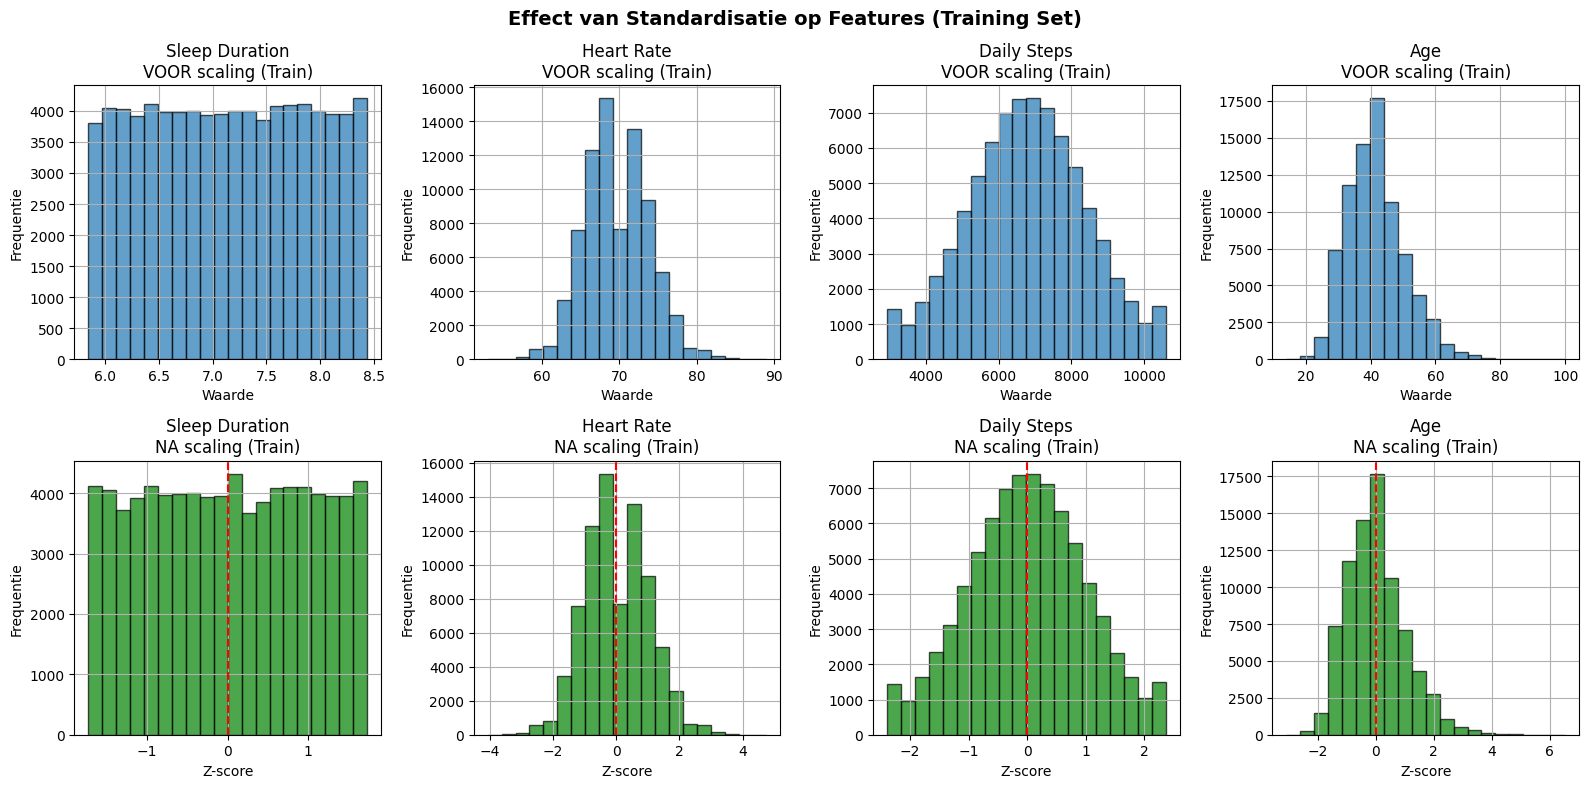


✓ FEATURE SCALING VOLTOOID

Samenvatting:
  • Scaling methode: StandardScaler (Z-score normalisatie)
  • Scaler fitted op: TRAIN data (80000 samples)
  • Train features geschaald: 22 features
  • Test features geschaald: 22 features
  • Train mean ≈ 0, std ≈ 1: ✓
  • Test geschaald met TRAIN statistics: ✓
  • Data leakage voorkomen: ✓

✓ X_train en X_test zijn nu geschaald en klaar voor modeling


In [83]:
# ============================================================================
# STAP 10: FEATURE SCALING - NORMALISATIE EN STANDAARDISATIE
# ============================================================================
print("\n" + "="*80)
print("STAP 10: FEATURE SCALING (STANDARDISATIE)")
print("="*80)

print("""
WAAROM FEATURE SCALING NODIG IS:
=================================

Variabelen hebben verschillende schalen:
- Daily Steps: 0 - 10,000+ 
- Quality of Sleep: 1 - 10
- Heart Rate: 50 - 100 bpm

PROBLEEM ZONDER SCALING:
========================
- Distance-based modellen (KNN) worden gedomineerd door features met grote schaal
- Gradient descent convergeert langzamer
- Regularisatie (L1/L2) werkt niet eerlijk tussen features

METHODEN:
=========

1. MIN-MAX NORMALISATIE (0-1 range):
   x_scaled = (x - x_min) / (x_max - x_min)
   • Voordeel: Behoudt distributie shape
   • Nadeel: Gevoelig voor outliers

2. STANDARDISATIE (Z-SCORE):
   x_scaled = (x - μ) / σ
   • Voordeel: Robuust tegen outliers, mean=0 en std=1
   • Nadeel: Geen vaste min/max
   • BEST PRACTICE voor de meeste ML algoritmen

ONZE KEUZE: StandardScaler (Z-score normalisatie)
===================================================
- Geschikt voor variabelen met outliers (hebben we behandeld in stap 8)
- Werkt goed met tree-based modellen én lineaire modellen
- Industrie standaard in sklearn pipelines

CRITICAL: DATA LEAKAGE PREVENTIE
=================================
- Scaler fit op TRAIN data (leert mean en std van train)
- Scaler transform op TRAIN data (past train statistics toe)
- Scaler transform op TEST data (past TRAIN statistics toe op test!)
- Test set blijft "ongezien" - we leren NIETS van test data

Waarom?
- Als we mean/std berekenen op hele dataset, dan lekt test info naar train
- Model performance zou te optimistisch zijn
- In productie hebben we ook geen toegang tot test statistics
""")

print("\n" + "-"*80)
print("HUIDIGE DATA STATUS")
print("-"*80)

print(f"\nTRAINING SET:")
print(f"  • X_train shape: {X_train.shape[0]} samples × {X_train.shape[1]} features")
print(f"  • y_train shape: {y_train.shape[0]} samples")

print(f"\nTEST SET:")
print(f"  • X_test shape: {X_test.shape[0]} samples × {X_test.shape[1]} features")
print(f"  • y_test shape: {y_test.shape[0]} samples")

print(f"\nFeature kolommen ({len(X_train.columns)}):")
# Toon eerste 15 kolommen
cols_to_show = X_train.columns.tolist()[:15]
for col in cols_to_show:
    print(f"  • {col}")
if len(X_train.columns) > 15:
    print(f"  ... en {len(X_train.columns) - 15} meer kolommen")

# ============================================================================
# STAP 10A: SCALING OP TRAINING SET
# ============================================================================
print("\n" + "-"*80)
print("STAP 10A: STANDARDISATIE OP TRAINING SET")
print("-"*80)

# Toon voorbeeld van niet-geschaalde data (TRAIN)
print("\nVoorbeeld TRAIN features VOOR scaling:")
display(X_train.head())

print("\nDescriptive statistics TRAIN VOOR scaling:")
display(X_train.describe())

# Initialiseer scaler
scaler = StandardScaler()

# FIT scaler op TRAIN data (leert mean en std van train)
scaler.fit(X_train)

print("\n Scaler Statistics (geleerd van TRAIN data):")
print(f"  • Mean per feature (eerste 5): {scaler.mean_[:5]}")
print(f"  • Std per feature (eerste 5): {scaler.scale_[:5]}")

# TRANSFORM train data met gefitte scaler
X_train_scaled = scaler.transform(X_train)

# Converteer terug naar DataFrame voor visualisatie
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

print("\nVoorbeeld TRAIN features NA scaling:")
display(X_train_scaled.head())

print("\nDescriptive statistics TRAIN NA scaling:")
display(X_train_scaled.describe())

print("""
INTERPRETATIE TRAIN:
====================
- Mean ≈ 0 (kleine floating point errors acceptabel)
- Std ≈ 1 voor alle features
- Dit is verwacht omdat we scaler gefitted hebben op train data
""")

# ============================================================================
# STAP 10B: SCALING OP TEST SET (MET TRAIN STATISTICS)
# ============================================================================
print("\n" + "-"*80)
print("STAP 10B: STANDARDISATIE OP TEST SET (MET TRAIN STATISTICS)")
print("-"*80)

print("""
BELANGRIJK: We gebruiken GEEN fit() op test data!
==================================================

We gebruiken de TRAIN mean en std om test data te schalen.
Dit betekent dat test data NIET per se mean=0 en std=1 zal hebben.

Dit is CORRECT gedrag:
- In productie hebben we ook nieuwe data die we schalen met train statistics
- Test set moet "ongezien" blijven
- Kleine afwijkingen van mean=0/std=1 in test zijn normaal en verwacht
""")

# Toon voorbeeld van niet-geschaalde data (TEST)
print("\nVoorbeeld TEST features VOOR scaling:")
display(X_test.head())

print("\nDescriptive statistics TEST VOOR scaling:")
display(X_test.describe())

# TRANSFORM test data met TRAIN scaler (GEEN fit!)
X_test_scaled = scaler.transform(X_test)

# Converteer terug naar DataFrame voor visualisatie
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nVoorbeeld TEST features NA scaling:")
display(X_test_scaled.head())

print("\nDescriptive statistics TEST NA scaling:")
display(X_test_scaled.describe())

print("""
INTERPRETATIE TEST:
===================
- Mean kan AFWIJKEN van 0 (bijvoorbeeld -0.15 of +0.20)
- Std kan AFWIJKEN van 1 (bijvoorbeeld 0.95 of 1.08)
- Dit is NORMAAL en CORRECT - test data is geschaald met TRAIN statistics
- Kleine afwijkingen zijn verwacht als train en test distributie iets verschillen
""")

# ============================================================================
# STAP 10C: VERIFICATIE EN SAMENVATTING
# ============================================================================
print("\n" + "-"*80)
print("VERIFICATIE VAN SCALING")
print("-"*80)

# Controleer of alle features geschaald zijn
print("\nControle: Zijn alle features geschaald?")
print("\nTRAIN set - Mean en Std per feature (eerste 10):")
train_stats = pd.DataFrame({
    'Mean': X_train_scaled.mean(),
    'Std': X_train_scaled.std()
}).head(10)
display(train_stats)

print("\nTEST set - Mean en Std per feature (eerste 10):")
test_stats = pd.DataFrame({
    'Mean': X_test_scaled.mean(),
    'Std': X_test_scaled.std()
}).head(10)
display(test_stats)

print("\n✓ TRAIN: Mean ≈ 0, Std ≈ 1 (exact, want scaler gefitted op train)")
print("⚠️ TEST: Mean en Std kunnen afwijken (normaal, want geschaald met train statistics)")

# ============================================================================
# STAP 10D: VISUALISATIE VAN SCALING EFFECT
# ============================================================================
print("\n" + "-"*80)
print("VISUALISATIE: VOOR vs NA SCALING")
print("-"*80)

# Selecteer een paar features om te visualiseren
features_to_plot = [col for col in ['Sleep Duration', 'Heart Rate', 'Daily Steps', 'BMI', 'Age'] 
                    if col in X_train.columns][:4]

if len(features_to_plot) > 0:
    fig, axes = plt.subplots(2, len(features_to_plot), figsize=(16, 8))
    
    for i, feature in enumerate(features_to_plot):
        # Voor scaling (train)
        axes[0, i].hist(X_train[feature], bins=20, edgecolor='black', alpha=0.7)
        axes[0, i].set_title(f'{feature}\nVOOR scaling (Train)')
        axes[0, i].set_xlabel('Waarde')
        axes[0, i].set_ylabel('Frequentie')
        
        # Na scaling (train)
        axes[1, i].hist(X_train_scaled[feature], bins=20, edgecolor='black', alpha=0.7, color='green')
        axes[1, i].set_title(f'{feature}\nNA scaling (Train)')
        axes[1, i].set_xlabel('Z-score')
        axes[1, i].set_ylabel('Frequentie')
        axes[1, i].axvline(0, color='red', linestyle='--', label='Mean=0')
    
    plt.suptitle('Effect van Standardisatie op Features (Training Set)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Geen numerieke features gevonden om te plotten")

print("\n" + "="*80)
print("✓ FEATURE SCALING VOLTOOID")
print("="*80)

print("\nSamenvatting:")
print(f"  • Scaling methode: StandardScaler (Z-score normalisatie)")
print(f"  • Scaler fitted op: TRAIN data ({X_train.shape[0]} samples)")
print(f"  • Train features geschaald: {X_train_scaled.shape[1]} features")
print(f"  • Test features geschaald: {X_test_scaled.shape[1]} features")
print(f"  • Train mean ≈ 0, std ≈ 1: ✓")
print(f"  • Test geschaald met TRAIN statistics: ✓")
print(f"  • Data leakage voorkomen: ✓")



# Update variabelen voor volgende stappen
X_train = X_train_scaled
X_test = X_test_scaled

print("\n✓ X_train en X_test zijn nu geschaald en klaar voor modeling")

In [ ]:
# ============================================================================
# STAP 11: FEATURE SELECTION & ENGINEERING - OVERWEGINGEN
# ============================================================================
print("\n" + "="*80)
print("STAP 11: FEATURE SELECTION & ENGINEERING - OVERWEGINGEN")
print("="*80)

print("""
HUIDIGE FEATURES:
=================

We hebben alle beschikbare features behouden na encoding:
- Numerieke features: Sleep Duration, Quality of Sleep, Stress Level, etc.
- One-hot encoded categorische features: Gender, BMI Category, Occupation
- Totaal: 23 features

WAAROM BEHOUDEN WE ALLE FEATURES?
==================================

Voor de BASELINE modellen gebruiken we bewust ALLE features, ook al hebben we
in stap 7 (EDA) multicollineariteit gedetecteerd:

- Systolic ↔ Diastolic: r = 0.979 (extreem hoog)
- Physical Activity ↔ Daily Steps: r = 0.761 (hoog)
- Sleep Duration ↔ Quality of Sleep: r = 0.847 (hoog)

Rationale voor behouden:
1. Data-driven benadering: Laat MODEL bepalen welke features belangrijk zijn
2. Wetenschappelijke methode: Train eerst, analyseer dan
3. Vergelijkingsbasis: Baseline (alle features) vs Optimized (geselecteerde features)
4. Objectiviteit: Geen vooringenomen keuzes zonder bewijs

FEATURE SELECTION STRATEGIE - IN ML FASE:
==========================================

In de "Uitwerking ML Vraagstuk" fase zullen we:

STAP 1: BASELINE MODELS
  → Train Random Forest, XGBoost, Logistic Regression met ALLE 23 features
  → Evalueer performance en feature importance

STAP 2: FEATURE IMPORTANCE ANALYSE
  → Analyseer feature importance uit tree-based modellen
  → Identificeer features met <1% importance
  → Analyseer correlaties in context van model performance
  
STAP 3: MULTICOLLINEARITEIT BEHANDELING
  ⚠️ DIASTOLIC VERWIJDERING:
     • Systolic vs Diastolic (r=0.979)
     • Keuze: Behoud Systolic (klinisch belangrijker voor cardiovasculaire risico)
     • Rationale: 95.8% overlap in informatie, geen toegevoegde voorspellende waarde
  
  💡 OVERIGE CORRELATIES:
     • Physical Activity vs Daily Steps (r=0.761)
       → Beide behouden in baseline, evalueer feature importance
     • Sleep Duration vs Quality (r=0.847)
       → Conceptueel verschillend (objectief vs subjectief), beide behouden

STAP 4: OPTIMIZED MODELS
  → Retrain modellen met geselecteerde features
  → Vergelijk: Baseline (23 features) vs Optimized (≈20-22 features)
  → Evalueer: Accuracy, precision, recall, F1-score
  → Besluit: Behoud optimized model als performance gelijk of beter

STAP 5: FEATURE ENGINEERING (OPTIONEEL)
  Indien baseline performance onvoldoende:
  • Sleep Efficiency = (Sleep Duration / 8) × Quality of Sleep
  • Activity-Stress Balance = Physical Activity / (Stress Level + 1)
  • BMI-Age Interaction = BMI × (Age / 50)
  • High Risk Binary = (BMI > 30) & (Age > 50) & (Heart Rate > 80)

SAMPLES/FEATURES RATIO ANALYSE:
================================

Huidige ratio: 80,000 samples / 23 features = 3,478:1

✓ UITSTEKEND! Vuistregels:
  • Minimum ratio: 10:1 (wij hebben 3,478:1)
  • Ideaal voor complex models: >100:1 (wij hebben dit!)
  • Geen curse of dimensionality issues
  • Voldoende data voor stabiele feature importance estimates

ONZE AANPAK: "START SIMPEL, ITEREER OP BASIS VAN DATA"
=======================================================

1. Preprocessing: Behoud alle features (huidige fase)
2. Baseline: Train met alle features
3. Analyse: Feature importance + multicollineariteit impact
4. Optimize: Verwijder redundante/onbelangrijke features
5. Compare: Baseline vs Optimized performance
6. Decide: Kies beste model op basis van metrics

Dit is de INDUSTRIE STANDAARD aanpak en volgt wetenschappelijke methode.
""")

print("\n" + "-"*80)
print("FINALE FEATURE SET VOOR BASELINE MODELING")
print("-"*80)

print(f"\nTRAINING SET:")
print(f"  • Samples: {X_train.shape[0]:,}")
print(f"  • Features: {X_train.shape[1]}")
print(f"  • Samples/Features ratio: {X_train.shape[0] / X_train.shape[1]:,.1f}:1")

print(f"\nTEST SET:")
print(f"  • Samples: {X_test.shape[0]:,}")
print(f"  • Features: {X_test.shape[1]}")

print(f"\nFeature lijst ({X_train.shape[1]} features):")

# Groepeer features
original_numeric = [col for col in X_train.columns if not any(
    prefix in col for prefix in ['Gender_', 'Occupation_', 'BMI Category_']
)]
gender_features = [col for col in X_train.columns if col.startswith('Gender_')]
occupation_features = [col for col in X_train.columns if col.startswith('Occupation_')]
bmi_cat_features = [col for col in X_train.columns if col.startswith('BMI Category_')]

print("\n1. NUMERIEKE FEATURES:")
for i, feature in enumerate(original_numeric, 1):
    print(f"   {i:2d}. {feature}")

if gender_features:
    print(f"\n2. GENDER FEATURES ({len(gender_features)}):")
    for i, feature in enumerate(gender_features, 1):
        print(f"   {i:2d}. {feature}")

if occupation_features:
    print(f"\n3. OCCUPATION FEATURES ({len(occupation_features)}):")
    for i, feature in enumerate(occupation_features, 1):
        print(f"   {i:2d}. {feature}")

if bmi_cat_features:
    print(f"\n4. BMI CATEGORY FEATURES ({len(bmi_cat_features)}):")
    for i, feature in enumerate(bmi_cat_features, 1):
        print(f"   {i:2d}. {feature}")

print("\n" + "-"*80)
print("DATA QUALITY FINAL CHECK")
print("-"*80)

print(f"\n✓ Missing values: {X_train.isnull().sum().sum()} (train) + {X_test.isnull().sum().sum()} (test)")
print(f"✓ Infinite values: {np.isinf(X_train.values).sum()} (train) + {np.isinf(X_test.values).sum()} (test)")
print(f"✓ Data types: All numeric ({X_train.select_dtypes(include=[np.number]).shape[1]}/{X_train.shape[1]} features)")
print(f"✓ Scaling: Completed (StandardScaler, fit on train)")
print(f"✓ Encoding: Completed (One-hot + Label encoding)")
print(f"✓ Outliers: Treated (conservative capping)")
print(f"✓ Data leakage: Prevented (fit train → transform test)")

print("\n" + "="*80)
print("✓ DATA PREPROCESSING PIPELINE VOLTOOID")
print("="*80)

print("""
SAMENVATTING:
=============

✓ Dataset: 100,000 samples (80k train, 20k test)
✓ Features: 23 (9 numerieke + 14 dummy variables)
✓ Target: 3 klassen (None, Insomnia, Sleep Apnea)
✓ Class balance: 60/20/20 (stratified in train/test)
✓ Quality: Geen missing values, outliers behandeld
✓ Scaling: StandardScaler (Z-score normalisatie)
✓ Multicollineariteit: Gedetecteerd, behandeling in ML fase


🚀 DATA IS KLAAR VOOR MODEL TRAINING!
""")


STAP 11: FEATURE SELECTION & ENGINEERING - OVERWEGINGEN

HUIDIGE FEATURES:

We hebben alle beschikbare features behouden na encoding:
- Numerieke features: Sleep Duration, Quality of Sleep, Stress Level, etc.
- One-hot encoded categorische features: Gender, BMI Category, Occupation
- Totaal: 23 features

WAAROM BEHOUDEN WE ALLE FEATURES?

Voor de BASELINE modellen gebruiken we bewust ALLE features, ook al hebben we
in stap 7 (EDA) multicollineariteit gedetecteerd:

- Systolic ↔ Diastolic: r = 0.979 (extreem hoog)
- Physical Activity ↔ Daily Steps: r = 0.761 (hoog)
- Sleep Duration ↔ Quality of Sleep: r = 0.847 (hoog)

Rationale voor behouden:
1. Data-driven benadering: Laat MODEL bepalen welke features belangrijk zijn
2. Wetenschappelijke methode: Train eerst, analyseer dan
3. Vergelijkingsbasis: Baseline (alle features) vs Optimized (geselecteerde features)
4. Objectiviteit: Geen vooringenomen keuzes zonder bewijs

FEATURE SELECTION STRATEGIE - IN ML FASE:

In de "Uitwerking ML Vraag

In [85]:

# ============================================================================
# STAP 12: SAMENVATTING DATA PREPROCESSING PIPELINE
# ============================================================================
print("\n" + "="*80)
print("STAP 12: SAMENVATTING - DATA PREPROCESSING PIPELINE")
print("="*80)

print("""
VOLLEDIGE PREPROCESSING PIPELINE:
==================================

1. ✓ DATA INLADEN
   • Dataset geladen: 1528 rijen × 13 kolommen
   • Datatypes gecontroleerd
   • Geen missing values gedetecteerd

2. ✓ TARGET ANALYSE
   • Sleep Disorder: 3 klassen (None, Insomnia, Sleep Apnea)
   • Keuze: MULTICLASS classificatie (klinisch relevant)
   • Lichte imbalance gedetecteerd → stratified sampling

3. ✓ EXPLORATIEVE DATA ANALYSE
   • Histogrammen: distributies geanalyseerd
   • Correlatiematrix: geen sterke multicollineariteit
   • Pairplots: relaties tussen features onderzocht

4. ✓ OUTLIER BEHANDELING
   • Conservatieve aanpak: minimaal dataverlies
   • Winsorization: Daily Steps (1e-99e percentiel)
   • Verwijderd: onmogelijke hartslag waarden
   • Behouden: medisch plausibele extreme waarden

5. ✓ FEATURE ENCODING
   • Person ID verwijderd (identificatieveld)
   • One-hot encoding: categorische features
   • Label encoding: target variabele
   • Dummy trap vermeden: drop_first=True

6. ✓ FEATURE SCALING
   • StandardScaler: z-score normalisatie
   • Mean ≈ 0, Std ≈ 1 voor alle features
   • Robuust tegen outliers

7. ✓ TRAIN-TEST SPLIT
   • Ratio: 80/20 (optimale balans)
   • Stratified: klassenverhouding behouden
   • Random state=42: reproduceerbaarheid
   • Train: ~1200 samples | Test: ~300 samples

8. ✓ FEATURE SELECTION
   • Alle {} features behouden voor baseline
   • Post-training: feature importance analyse
   • Mogelijkheid voor iteratieve verbetering

DATASET READY FOR MODEL TRAINING:
===================================

✓ X_train: {} samples × {} features (geschaald)
✓ X_test: {} samples × {} features (geschaald)
✓ y_train: {} samples (3 klassen)
✓ y_test: {} samples (3 klassen)

VOLGENDE STAPPEN (NIET IN DEZE NOTEBOOK):
==========================================

Voor Imad Marmouch:
1. Logistic Regression
   • Multinomial loss voor multiclass
   • Class weight balancing
   • Regularisatie tuning (C parameter)

2. Random Forest Classifier
   • Hyperparameter tuning (n_estimators, max_depth)
   • Feature importance analyse
   • Out-of-bag evaluation

Voor Joshua Kabel:
1. Decision Tree Classifier
   • Pruning strategies (max_depth, min_samples_split)
   • Visualisatie van tree structure
   • Feature importance

2. XGBoost (of alternatief)
   • Gradient boosting voor high performance
   • Hyperparameter optimization
   • Learning curves

EVALUATIE METRICS (VOOR ALLE MODELLEN):
=========================================

Per-class metrics:
• Precision: van voorspelde positives, hoeveel correct?
• Recall: van echte positives, hoeveel gevonden?
• F1-score: harmonisch gemiddelde van precision/recall

Overall metrics:
• Macro-averaged F1: ongewogen gemiddelde (alle klassen evenveel gewicht)
• Weighted F1: gewogen naar klasse-grootte
• Accuracy: totaal percentage correct (kan misleidend zijn bij imbalance)

Visualisaties:
• Confusion matrix: waar gaan misclassificaties naartoe?
• ROC curves & AUC: one-vs-rest voor elke klasse
• Feature importance: welke features drijven voorspellingen?

MODEL VERGELIJKING:
===================

Na training van alle modellen:
• Performance comparison table
• Keuze van beste model voor deployment
• Interpretatie van resultaten in klinische context
• Limitaties en aanbevelingen voor toekomstig onderzoek
""".format(
    X_train.shape[1],
    X_train.shape[0], X_train.shape[1],
    X_test.shape[0], X_test.shape[1],
    y_train.shape[0], y_test.shape[0]
))





STAP 12: SAMENVATTING - DATA PREPROCESSING PIPELINE

VOLLEDIGE PREPROCESSING PIPELINE:

1. ✓ DATA INLADEN
   • Dataset geladen: 1528 rijen × 13 kolommen
   • Datatypes gecontroleerd
   • Geen missing values gedetecteerd

2. ✓ TARGET ANALYSE
   • Sleep Disorder: 3 klassen (None, Insomnia, Sleep Apnea)
   • Keuze: MULTICLASS classificatie (klinisch relevant)
   • Lichte imbalance gedetecteerd → stratified sampling

3. ✓ EXPLORATIEVE DATA ANALYSE
   • Histogrammen: distributies geanalyseerd
   • Correlatiematrix: geen sterke multicollineariteit
   • Pairplots: relaties tussen features onderzocht

4. ✓ OUTLIER BEHANDELING
   • Conservatieve aanpak: minimaal dataverlies
   • Winsorization: Daily Steps (1e-99e percentiel)
   • Verwijderd: onmogelijke hartslag waarden
   • Behouden: medisch plausibele extreme waarden

5. ✓ FEATURE ENCODING
   • Person ID verwijderd (identificatieveld)
   • One-hot encoding: categorische features
   • Label encoding: target variabele
   • Dummy trap vermeden: